# **Data context**

The dataset consists of 6210195 examples of rides with their detailed characteristics.


# **Data content**

The csv file consists of 10 fields. The decsription of each field is as below:

* **trip_id**: id of a trip
* **customer_id**: id of a customer
* **driver_id**: id of a driver
* **product_name**: name of the product, type of vehicle
* **booking_time**: time of booking a trip with detailed time and date
* **eta**: estimated time arrival calculated in seconds
* **is_on_time**: checks whether vehicle was on time
* **status**: the overall summary of a trip
* **promotion_applied**: the amount of promotion for ride
* **gross_bookings**: the price for ride

# **Installation and imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import auc, RocCurveDisplay
from sklearn.metrics._plot.precision_recall_curve import precision_recall_curve
from sklearn import metrics

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTE

from joblib import dump, load
import joblib

warnings.filterwarnings('ignore')

from google.colab import drive, files
import os

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load the data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset_coe_junior_data_scientist_rides.csv")

# **EDA**

In [ ]:
# Shape of data
df.shape

(6210195, 10)

In [ ]:
# First 5 rows of data
df.head()

trip_id       customer_id           driver_id product_name  \
0  14-5e05-8d3c806  79e4-fa0f-995409  22fa-68e4-a628-694        GO-XL   
1  e4-18c0-039044e  2104-f631-c2509b                  \N     GO-DRIVE   
2  d4-4ae2-c35ed83  30a4-8ada-d481f4  4d9b-d444-07aa-def     GO-DRIVE   
3  34-397b-1569e13  89b4-1ebd-68a173  29ba-4464-a5a9-953     GO-DRIVE   
4  a4-7f67-2e8d4b7  2d94-eb41-a31d97  5f29-c344-7ad0-062     GO-DRIVE   

              booking_time  eta is_on_time             status  \
0  2021-08-04 20:15:41.000  400         \N  customer_canceled   
1  2021-08-08 02:14:37.000   \N         \N        unfulfilled   
2  2021-08-08 08:40:36.000  483         \N          completed   
3  2021-08-08 20:04:58.000  332         \N          completed   
4  2021-08-17 11:24:46.000  170         \N          completed   

  promotion_applied      gross_bookings  
0                \N                  \N  
1                \N                  \N  
2                \N  6.6722152864474955  
3                \N    7.57511444028298  
4                \N   7.473429951690822

In [ ]:
# Last 5 row of data
df.tail()

trip_id       customer_id           driver_id product_name  \
6210190  c4-d0f1-09c2908  0ef4-75f8-6abbd2  1faa-4dd4-2c58-9b8     GO-DRIVE   
6210191  a4-989f-ae966dd  1684-8824-00f329  506a-1bb4-8970-36a     GO-DRIVE   
6210192  c4-2b50-1a7571d  aed4-ef4a-882d05  1faa-4dd4-2c58-9b8     GO-DRIVE   
6210193  f4-50c8-477eef7  5574-f352-b196f8  c929-9204-f899-f7a     GO-DRIVE   
6210194  54-1e3e-751d121  ba84-05eb-ac749b  ddfb-43c4-43a1-390     GO-DRIVE   

                    booking_time  eta is_on_time     status promotion_applied  \
6210190  2020-01-02 04:02:15.000  100         \N  completed                \N   
6210191  2020-01-22 21:14:56.000  122         \N  completed                \N   
6210192  2020-01-22 04:03:42.000  171         \N  completed                \N   
6210193  2020-01-17 23:52:18.000   63         \N  completed                \N   
6210194  2020-01-17 00:23:11.000   13       true  completed                \N   

             gross_bookings  
6210190  10.511804239186628  
6210191   6.908923788014076  
6210192   7.809998434483118  
6210193  12.530631902998431  
6210194   6.759432895265019

In [ ]:
# Data types
df.dtypes

trip_id              object
customer_id          object
driver_id            object
product_name         object
booking_time         object
eta                  object
is_on_time           object
status               object
promotion_applied    object
gross_bookings       object
dtype: object

In [ ]:
# Unique values in each column
pd.Series({c: df[c].unique() for c in df})

trip_id              6210195
customer_id           460570
driver_id               4461
product_name               5
booking_time         5612226
eta                     1644
is_on_time                 3
status                     5
promotion_applied     104102
gross_bookings       2093229
dtype: int64


In [ ]:
# Unique value in each column
print(df.nunique())

trip_id              [14-5e05-8d3c806, e4-18c0-039044e, d4-4ae2-c35...
customer_id          [79e4-fa0f-995409, 2104-f631-c2509b, 30a4-8ada...
driver_id            [22fa-68e4-a628-694, \N, 4d9b-d444-07aa-def, 2...
product_name          [GO-XL, GO-DRIVE, GO-ABS, GO-SPECIAL, GO-YELLOW]
booking_time         [2021-08-04 20:15:41.000, 2021-08-08 02:14:37....
eta                  [400, \N, 483, 332, 170, 199, 654, 496, 64, 72...
is_on_time                                           [\N, true, false]
status               [customer_canceled, unfulfilled, completed, dr...
promotion_applied    [\N, -4.740875402041673, -2.86908077994429, -3...
gross_bookings       [\N, 6.6722152864474955, 7.57511444028298, 7.4...
dtype: object

In [ ]:
# Change the type of booking_time column
df['booking_time'] = pd.to_datetime(df['booking_time'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6210195 entries, 0 to 6210194
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   trip_id            object        
 1   customer_id        object        
 2   driver_id          object        
 3   product_name       object        
 4   booking_time       datetime64[ns]
 5   eta                object        
 6   is_on_time         object        
 7   status             object        
 8   promotion_applied  object        
 9   gross_bookings     object        
dtypes: datetime64[ns](1), object(9)
memory usage: 473.8+ MB
None


In [ ]:
# Retrieve the number of rows with missing values for each column
df.isin(['\\N']).sum(axis=0)

trip_id                    0
customer_id                0
driver_id             661359
product_name               0
booking_time               0
eta                   698455
is_on_time           4788980
status                     0
promotion_applied    6074984
gross_bookings        880396
dtype: int64

In [ ]:
# Drop the rows with missing information for driver_id column
df['driver_id'] = df['driver_id'].replace('\\N', np.nan)
df = df.dropna(axis=0, subset = ['driver_id'])

In [ ]:
# Shape of data after dropping rows
df.shape

(5548836, 10)

In [ ]:
# Drop trip_id, customer_id, driver_id column (each row from now on is considered as different one, rows repetitions for the same customers are not considerd)
df.drop(columns=['trip_id', 'customer_id', 'driver_id'], inplace=True)

In [ ]:
# Replace missing values with nan value
df = df.replace('\\N', np.nan)

In [ ]:
# First 5 rows of data after transformations
df.head()

product_name        booking_time  eta is_on_time             status  \
0        GO-XL 2021-08-04 20:15:41  400        NaN  customer_canceled   
2     GO-DRIVE 2021-08-08 08:40:36  483        NaN          completed   
3     GO-DRIVE 2021-08-08 20:04:58  332        NaN          completed   
4     GO-DRIVE 2021-08-17 11:24:46  170        NaN          completed   
5     GO-DRIVE 2021-07-30 13:55:34  199        NaN          completed   

  promotion_applied      gross_bookings  
0               NaN                 NaN  
2               NaN  6.6722152864474955  
3               NaN    7.57511444028298  
4               NaN   7.473429951690822  
5               NaN   9.672615727830452

In [ ]:
# Handling with missing data for eta column - they will be replaced by mean value of eta for particular product_name
df['eta'] = pd.to_numeric(df['eta'])
eta_xl =  round(df.loc[df['product_name'] == 'GO-XL', 'eta'].mean())
eta_abs = round(df.loc[df['product_name'] == 'GO-ABS', 'eta'].mean())
eta_drive = round(df.loc[df['product_name'] == 'GO-DRIVE', 'eta'].mean())
eta_special = round(df.loc[df['product_name'] == 'GO-SPECIAL', 'eta'].mean())
eta_yellow = round(df.loc[df['product_name'] == 'GO-YELLOW', 'eta'].mean())

In [ ]:
# Replacing values for eta column
df.loc[df['product_name'] == 'GO-XL', 'eta'] = df.loc[df['product_name'] == 'GO-XL', 'eta'].replace(np.nan, eta_xl)
df.loc[df['product_name'] == 'GO-ABS', 'eta'] = df.loc[df['product_name'] == 'GO-ABS', 'eta'].replace(np.nan, eta_abs)
df.loc[df['product_name'] == 'GO-DRIVE', 'eta'] = df.loc[df['product_name'] == 'GO-DRIVE', 'eta'].replace(np.nan, eta_drive)
df.loc[df['product_name'] == 'GO-SPECIAL', 'eta'] = df.loc[df['product_name'] == 'GO-SPECIAL', 'eta'].replace(np.nan, eta_special)
df.loc[df['product_name'] == 'GO-YELLOW', 'eta'] = df.loc[df['product_name'] == 'GO-YELLOW', 'eta'].replace(np.nan, eta_yellow)

In [ ]:
# Handling with missing data for is_on_time column - they will be replaced accordingly to distribution values
dist = df['is_on_time'].value_counts(normalize=True)
print(dist)

true     0.906762
false    0.093238
Name: is_on_time, dtype: float64


In [ ]:
# Define missing rows for is_on_time column
nan_rows = df['is_on_time'].isna()

In [ ]:
# Filling missing values for is_on_time column
df.loc[nan_rows,'is_on_time'] = np.random.choice(dist.index, size=len(df[nan_rows]), p=dist.values)

In [ ]:
# Handling with missing data for promotion_applied column - they will be replaced by mean value of eta for particular product_name
df['promotion_applied'] = pd.to_numeric(df['promotion_applied'])
promotion_xl =  round(df.loc[df['product_name'] == 'GO-XL', 'promotion_applied']).mean()
promotion_abs = round(df.loc[df['product_name'] == 'GO-ABS', 'promotion_applied']).mean()
promotion_drive = round(df.loc[df['product_name'] == 'GO-DRIVE', 'promotion_applied']).mean()
promotion_special = round(df.loc[df['product_name'] == 'GO-SPECIAL', 'promotion_applied']).mean()
promotion_yellow = round(df.loc[df['product_name'] == 'GO-YELLOW', 'promotion_applied']).mean()

In [ ]:
# Replacing values for promotion_applied column
df.loc[df['product_name'] == 'GO-XL', 'promotion_applied'] = df.loc[df['product_name'] == 'GO-XL', 'promotion_applied'].replace(np.nan, promotion_xl)
df.loc[df['product_name'] == 'GO-ABS', 'promotion_applied'] = df.loc[df['product_name'] == 'GO-ABS', 'promotion_applied'].replace(np.nan, promotion_abs)
df.loc[df['product_name'] == 'GO-DRIVE', 'promotion_applied'] = df.loc[df['product_name'] == 'GO-DRIVE', 'promotion_applied'].replace(np.nan, promotion_drive)
df.loc[df['product_name'] == 'GO-SPECIAL', 'promotion_applied'] = df.loc[df['product_name'] == 'GO-SPECIAL', 'promotion_applied'].replace(np.nan, promotion_special)
df.loc[df['product_name'] == 'GO-YELLOW', 'promotion_applied'] = df.loc[df['product_name'] == 'GO-YELLOW', 'promotion_applied'].replace(np.nan, promotion_yellow)

In [ ]:
# Handling with missing data for gross_bookings column - they will be replaced by mean value of eta for particular product_name
df['gross_bookings'] = pd.to_numeric(df['gross_bookings'])
gross_xl =  round(df.loc[df['product_name'] == 'GO-XL', 'gross_bookings']).mean()
gross_abs = round(df.loc[df['product_name'] == 'GO-ABS', 'gross_bookings']).mean()
gross_drive = round(df.loc[df['product_name'] == 'GO-DRIVE', 'gross_bookings']).mean()
gross_special = round(df.loc[df['product_name'] == 'GO-SPECIAL', 'gross_bookings']).mean()
gross_yellow = round(df.loc[df['product_name'] == 'GO-YELLOW', 'gross_bookings']).mean()

In [ ]:
# Replacing values for gross_bookings column
df.loc[df['product_name'] == 'GO-XL', 'gross_bookings'] = df.loc[df['product_name'] == 'GO-XL', 'gross_bookings' ].replace(np.nan, gross_xl)
df.loc[df['product_name'] == 'GO-ABS', 'gross_bookings' ] = df.loc[df['product_name'] == 'GO-ABS', 'gross_bookings' ].replace(np.nan, gross_abs)
df.loc[df['product_name'] == 'GO-DRIVE', 'gross_bookings' ] = df.loc[df['product_name'] == 'GO-DRIVE', 'gross_bookings' ].replace(np.nan, gross_drive)
df.loc[df['product_name'] == 'GO-SPECIAL', 'gross_bookings' ] = df.loc[df['product_name'] == 'GO-SPECIAL', 'gross_bookings' ].replace(np.nan, gross_special)
df.loc[df['product_name'] == 'GO-YELLOW', 'gross_bookings' ] = df.loc[df['product_name'] == 'GO-YELLOW', 'gross_bookings' ].replace(np.nan, gross_yellow)

In [ ]:
# Check missing values
df.isna().sum()

product_name         0
booking_time         0
eta                  0
is_on_time           0
status               0
promotion_applied    0
gross_bookings       0
dtype: int64

# **Specify the target column**

Currenly, the data is missing target variable. It will be created based on other columns accordingly to below rules:

* **platform hard churn**: people who are more likely to churn in the near future due to below circumstances from past rides:

  * status = driver_cancelled
  * status = completed + is_on_time = false
  * status = unfilfilled + is_on_time = false
  * status = customer_cancelled

* **platform soft churn**: people who are less likely to churn in the near future due to below circumstances from past rides:

  * status = completed + is_on_time = true
  * status = unfulfilled + is_on_time = true
  * status = fare_split

In [ ]:
# Hard churn
d_can = df[df['status'] == 'driver_canceled']
c_not_t = df[(df['status']=='completed') & (df['is_on_time'] == 'false')]
u_not_t = df[(df['status']=='unfulfilled') & (df['is_on_time'] == 'false')]
c_can = df[df['status']=='customer_canceled']

first =  pd.concat([d_can, c_not_t, u_not_t, c_can])

first['churn'] = '1'

In [ ]:
first.shape

(797217, 8)

In [ ]:
first.head()

product_name        booking_time    eta is_on_time           status  \
135     GO-DRIVE 2021-06-02 22:52:55  295.0       true  driver_canceled   
200     GO-DRIVE 2021-04-14 02:01:08  145.0       true  driver_canceled   
288     GO-DRIVE 2021-08-21 00:04:50  352.0       true  driver_canceled   
355     GO-DRIVE 2021-06-16 16:43:56  299.0       true  driver_canceled   
384     GO-DRIVE 2021-02-24 15:34:51  125.0       true  driver_canceled   

     promotion_applied  gross_bookings churn  
135          -4.858732        6.668131     1  
200          -4.858732        7.503577     1  
288          -4.858732        6.449591     1  
355          -4.858732        7.644934     1  
384          -4.858732        6.639363     1

In [ ]:
# Soft churn
c_on_t = df[(df['status']=='completed') & (df['is_on_time'] == 'true')]
u_on_t = df[(df['status']=='unfulfilled') & (df['is_on_time'] == 'true')]
fare = c_can = df[df['status']=='fare_split']

second = pd.concat([c_on_t, u_on_t, fare])

second['churn'] = '0'

In [ ]:
second.shape

(4751619, 8)

In [ ]:
second.head()

product_name        booking_time    eta is_on_time     status  \
2     GO-DRIVE 2021-08-08 08:40:36  483.0       true  completed   
4     GO-DRIVE 2021-08-17 11:24:46  170.0       true  completed   
5     GO-DRIVE 2021-07-30 13:55:34  199.0       true  completed   
6     GO-DRIVE 2021-07-30 15:10:17  654.0       true  completed   
7     GO-DRIVE 2021-07-30 20:33:58  496.0       true  completed   

   promotion_applied  gross_bookings churn  
2          -4.858732        6.672215     0  
4          -4.858732        7.473430     0  
5          -4.858732        9.672616     0  
6          -4.858732        8.561071     0  
7          -4.858732       11.390332     0

In [ ]:
first.isna().sum()

product_name         0
booking_time         0
eta                  0
is_on_time           0
status               0
promotion_applied    0
gross_bookings       0
churn                0
dtype: int64

In [ ]:
second.isna().sum()

product_name         0
booking_time         0
eta                  0
is_on_time           0
status               0
promotion_applied    0
gross_bookings       0
churn                0
dtype: int64

In [ ]:
# Create new dataframe from soft and hard churn
df = pd.concat([first, second])

In [ ]:
df.shape

(5548836, 8)

In [ ]:
# Export data to csv file for sql queries
df.to_csv('data.csv', encoding = 'utf-8-sig')
files.download('data.csv')

In [ ]:
# Export data to csv file on Google drive for sql queries
path = '/content/drive/My Drive/data.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
 df.to_csv(f)

In [ ]:
# Data info after transformations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5548836 entries, 0 to 5548835
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   booking_time       datetime64[ns]
 1   churn              object        
 2   eta                float64       
 3   gross_bookings     float64       
 4   is_on_time         object        
 5   product_name       object        
 6   promotion_applied  float64       
 7   status             object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 338.7+ MB


In [ ]:
# Change the type for churn, is_on_time, product_name and status
df['churn'] = df['churn'].astype('category')
df['is_on_time'] = df['is_on_time'].astype('category')
df['product_name'] = df['product_name'].astype('category')
df['status'] = df['status'].astype('category')

In [ ]:
# Check the details after change - less memory usage
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5548836 entries, 135 to 6209953
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   product_name       category      
 1   booking_time       datetime64[ns]
 2   eta                float64       
 3   is_on_time         category      
 4   status             category      
 5   promotion_applied  float64       
 6   gross_bookings     float64       
 7   churn              category      
dtypes: category(4), datetime64[ns](1), float64(3)
memory usage: 232.8 MB
None


In [ ]:
# Statistics for categorical data
print(df.describe(include = 'category').T)

                count unique        top     freq
product_name  5548836      5   GO-DRIVE  5329786
is_on_time    5548836      2       true  5031461
status        5548836      5  completed  5160142
churn         5548836      2          0  4751619


In [ ]:
# Statistics for numerical data
print(df.describe().T)

                       count        mean         std        min         25%  \
eta                5548836.0  225.843876  192.554723   1.000000  101.000000   
promotion_applied  5548836.0   -4.855469    0.433625 -76.269494   -4.858732   
gross_bookings     5548836.0   11.317170    9.122341   3.728334    7.209256   

                          50%         75%          max  
eta                172.000000  293.000000  6572.000000  
promotion_applied   -4.858732   -4.858732    -0.269008  
gross_bookings       9.419355   12.666573   932.489818  


In [ ]:
# Group by is_on_time and product_name
occur = df.groupby(['is_on_time', 'product_name'], as_index = False).size()
by_time_and_product = pd.DataFrame(occur)
print(by_time_and_product)

  is_on_time product_name     size
0      false       GO-ABS     1337
1      false     GO-DRIVE   492429
2      false   GO-SPECIAL     7873
3      false        GO-XL    15811
4      false    GO-YELLOW      227
5       true       GO-ABS    11256
6       true     GO-DRIVE  4837357
7       true   GO-SPECIAL    72729
8       true        GO-XL   107606
9       true    GO-YELLOW     2211


In [ ]:
# Group by product_name and status
occur = df.groupby(['product_name', 'status'], as_index = False).size()
by_product_and_status = pd.DataFrame(occur)
print(by_product_and_status)

   product_name             status     size
0        GO-ABS          completed    10853
1        GO-ABS  customer_canceled     1185
2        GO-ABS    driver_canceled      255
3        GO-ABS         fare_split       30
4        GO-ABS        unfulfilled      270
5      GO-DRIVE          completed  4972252
6      GO-DRIVE  customer_canceled   201151
7      GO-DRIVE    driver_canceled    90008
8      GO-DRIVE         fare_split    32017
9      GO-DRIVE        unfulfilled    34358
10   GO-SPECIAL          completed    78282
11   GO-SPECIAL  customer_canceled     1827
12   GO-SPECIAL    driver_canceled      314
13   GO-SPECIAL         fare_split       30
14   GO-SPECIAL        unfulfilled      149
15        GO-XL          completed    96770
16        GO-XL  customer_canceled    16302
17        GO-XL    driver_canceled     3803
18        GO-XL         fare_split     5017
19        GO-XL        unfulfilled     1525
20    GO-YELLOW          completed     1985
21    GO-YELLOW  customer_cancel

In [ ]:
# Group by is_on_time and status
occur = df.groupby(['is_on_time', 'status'], as_index = False).size()
by_time_and_status = pd.DataFrame(occur)
print(by_time_and_status)

  is_on_time             status     size
0      false          completed   478740
1      false  customer_canceled    19694
2      false    driver_canceled    11438
3      false         fare_split     4305
4      false        unfulfilled     3500
5       true          completed  4681402
6       true  customer_canceled   201111
7       true    driver_canceled    83025
8       true         fare_split    32791
9       true        unfulfilled    32830


In [ ]:
# Retrieve day of weekday, year, month and day from booking_time column
df['weekday'] = df['booking_time'].dt.day_name()
df['year'] = df['booking_time'].dt.year
df['month'] = df['booking_time'].dt.month
df['day'] = df['booking_time'].dt.day

In [ ]:
# Drop original booking_time column
df = df.drop(columns=['booking_time'])

In [ ]:
# Amount of rides group by day of week
occur = df.groupby(['weekday']).size()
display(occur)

weekday
Friday        956011
Monday        627570
Saturday     1110447
Sunday        798828
Thursday      711561
Tuesday       639456
Wednesday     704963
dtype: int64

In [ ]:
# Change the type for weekday column to category
df['weekday'] = df['weekday'].astype('category')

<Axes: >

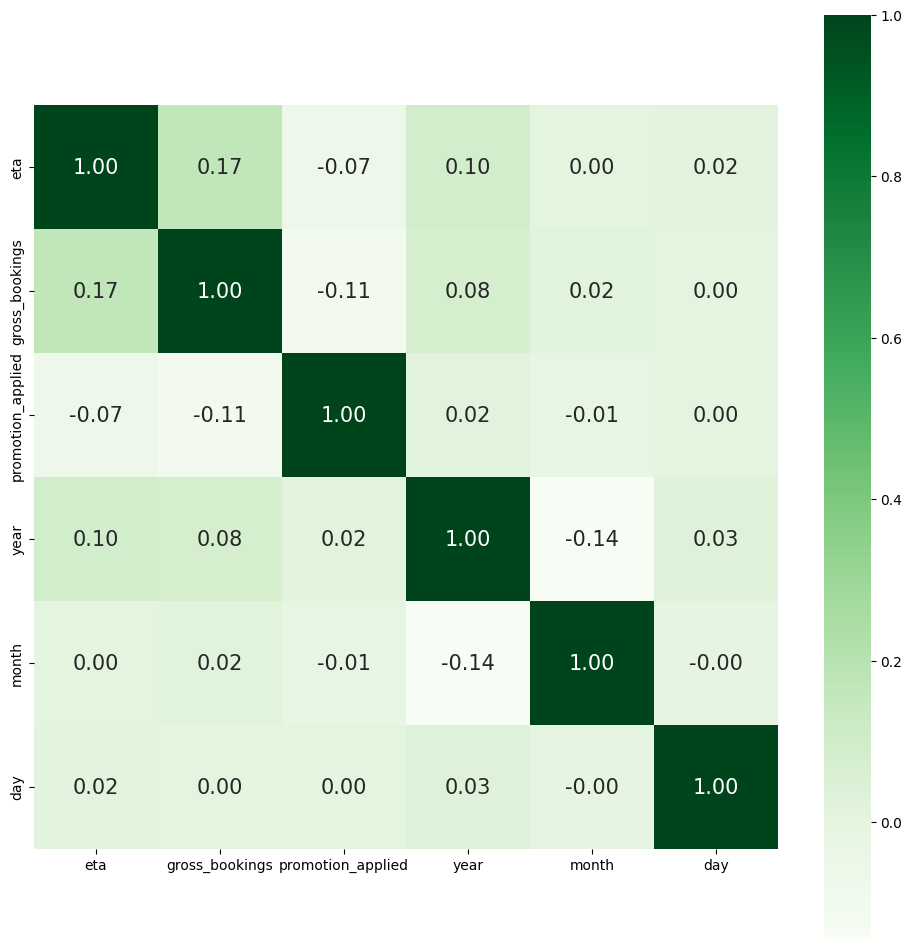

In [ ]:
# Correlation matrix
plt.figure(figsize=(12,12))
count_corr = df.corr()
sns.heatmap(count_corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

* The highest correlation is between gross_bookings/eta (0.17).
* The lowest correlation is between month/day, promotion_applied/day, gross_bookings/day and eta/month (0.00).

# **Visualization**




[]

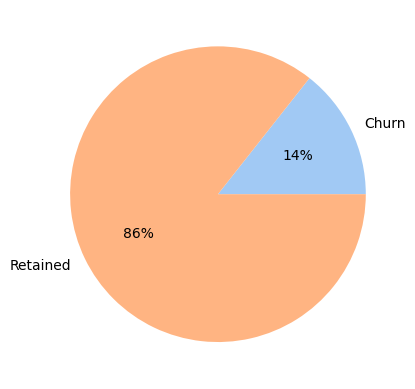

In [ ]:
# Based on below countplot for Churn column, dataset is not well balanced (14% vs 86%)
churn = (df[df['churn'] == '1']).count()
non_churn = (df[df['churn'] == '0']).count()
data = [churn[0], non_churn[0]]
colors = sns.color_palette('pastel')
labels = ['Churn', 'Retained']
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.plot()

In [ ]:
# Due to compute limitations, for further visualisation analysis only 5% rows of data will be considered for some visualizations
sample = df.sample(frac = 0.05)

<Axes: xlabel='is_on_time', ylabel='count'>

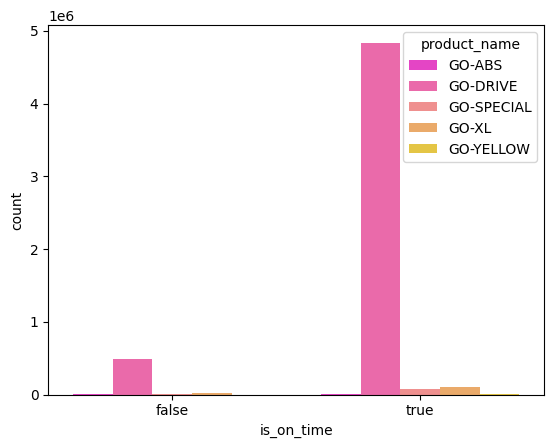

In [ ]:
# Most rides were on time, the highest amount of product_name GO-DRIVE
sns.countplot(x='is_on_time', hue='product_name', data=df, palette='spring')

<Axes: xlabel='weekday', ylabel='count'>

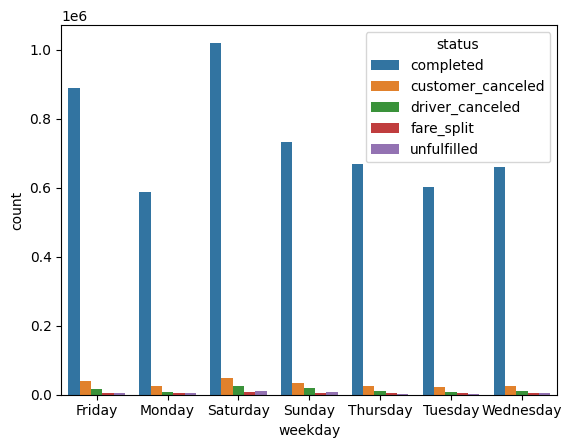

In [ ]:
# Most rides were completed, the least amount were unfulfilled
sns.countplot(x='weekday', hue='status', data=df, palette='tab10')

<Axes: xlabel='is_on_time'>

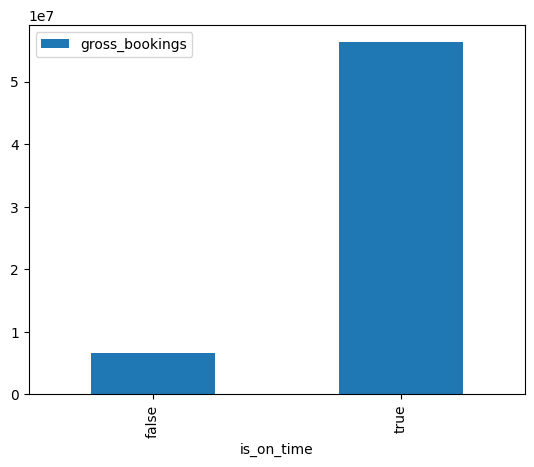

In [ ]:
# Most of rides were on time with amount of gross_bookings of approximately 5.5M
group_time = df.groupby(by=["is_on_time"]).aggregate({"gross_bookings":"sum"})
group_time.plot(kind='bar')

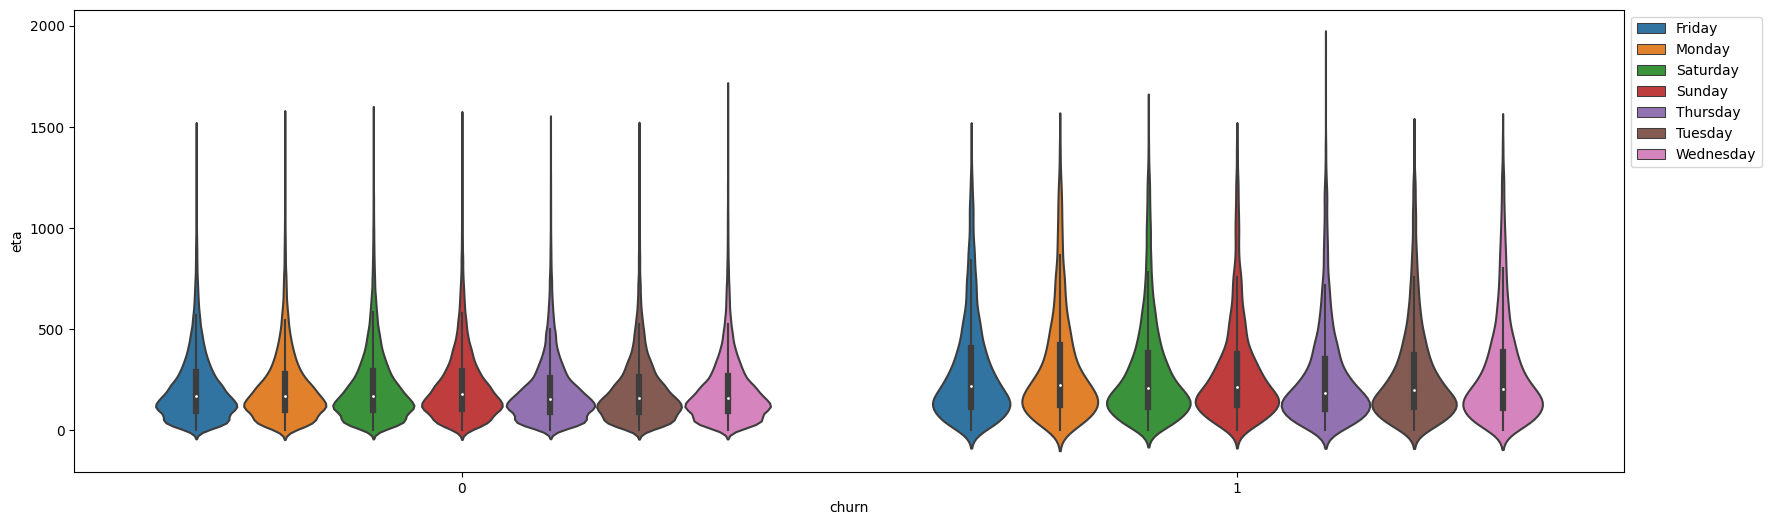

In [ ]:
# Violin plots for churn, eta and day (more outliers for churned examples for Thursday)
plt.figure(figsize=(20,6))
v = sns.violinplot(x='churn', y='eta', data=sample, hue='weekday')
plt.legend(loc=2, bbox_to_anchor=(1,1))

In [ ]:
# The lower the gross_bookings, the most probable is that the customer will churn in the nearest future
print('Percentage of churn in gross_bookings above 20:')
above_20 = df[(df['gross_bookings'] >= 20)]
above_20_churn = df[(df['gross_bookings'] >= 20) & (df['churn'] == '1')]
print(len(above_20_churn)/len(above_20)*100)

print('Percentage of churn in gross_bookings below 20:')
below_20 = df[(df['gross_bookings'] < 20)]
below_20_churn = df[(df['gross_bookings'] < 20) & (df['churn'] == '1')]
print(len(below_20_churn)/len(below_20)*100)

Percentage of churn in gross_bookings above 20:
13.33898981832701
Percentage of churn in gross_bookings below 20:
14.452976584055216


<Axes: >

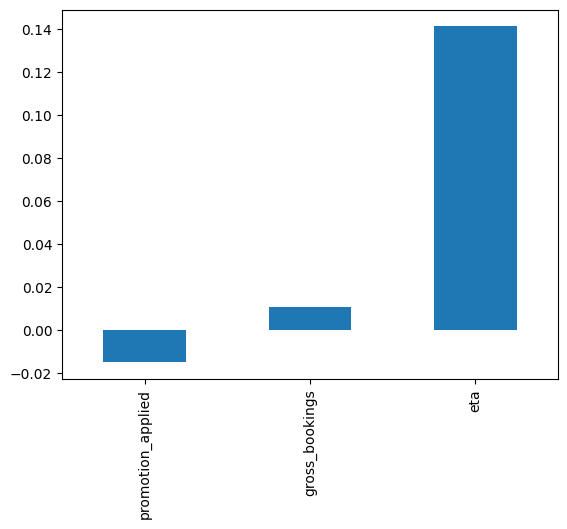

In [ ]:
# The correlation between numerical columns and target column (churn), the highest correlation for eta
df['churn'] = df['churn'].astype(np.int32)
num_cols = ['churn', 'eta', 'gross_bookings', 'promotion_applied']
df[num_cols].corr()['churn'][1:].sort_values().plot(kind = 'bar')

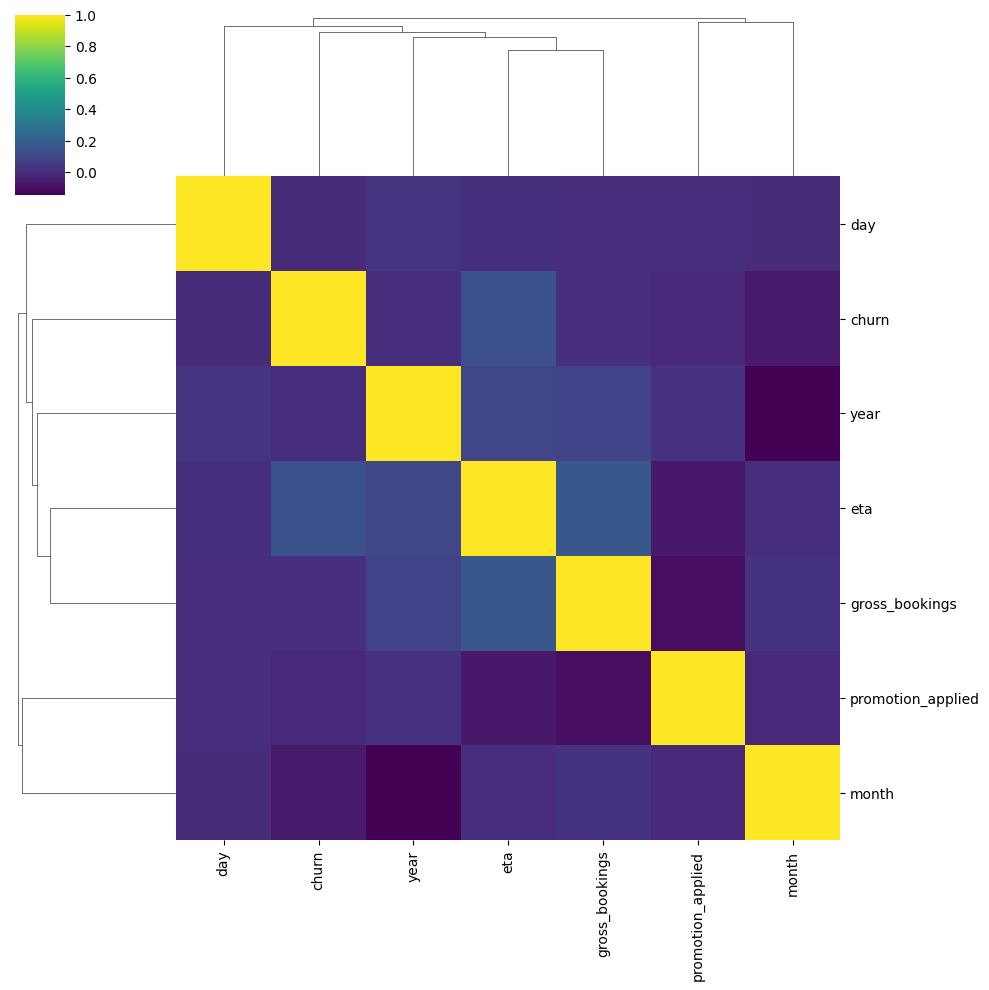

In [ ]:
# Clustemap for all columns
sns.clustermap(df.corr(), cmap = 'viridis')

* Clustermap displays hierachical clustering. It is a method of grouping data based on similarity.
* Based on above, the most similar columns are month/promotion_applied and eta/gross_bookings at first level.

Text(0.5, 1.0, 'Churned customers per product_name')

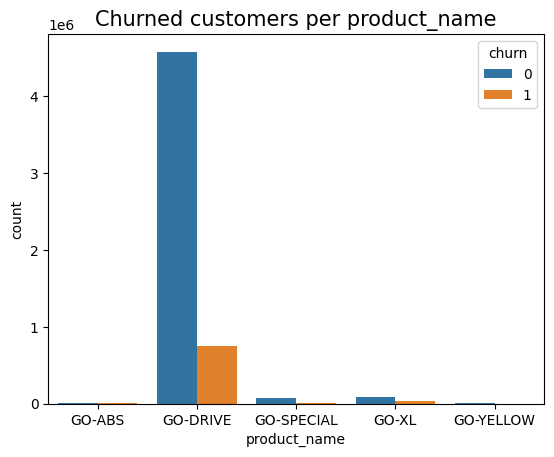

In [ ]:
# The most customers who will churn used GO-DRIVE but on the other hand the most customers who will retain also used GO-DRIVE
sns.countplot(x='product_name', hue='churn', data = df)
plt.title('Churned customers per product_name', fontsize=15, color='black')

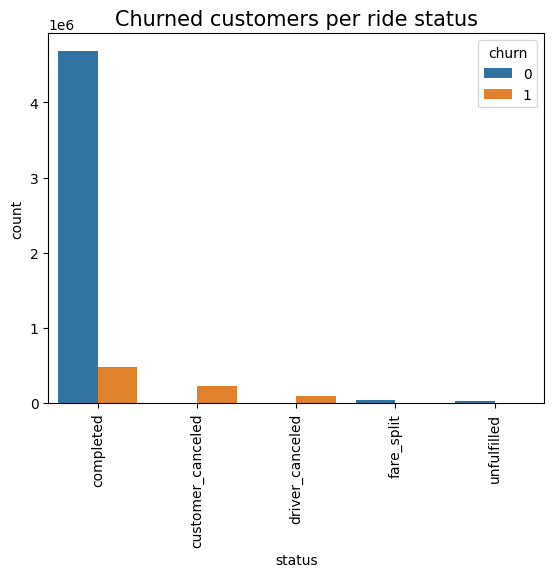

In [ ]:
# The most customers who will churn had trip status completed, the same situation for those who will retain
sns.countplot(x='status', hue='churn', data = df)
plt.title('Churned customers per ride status', fontsize=15, color='black')
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 1.0, 'Churned customers per weekday')

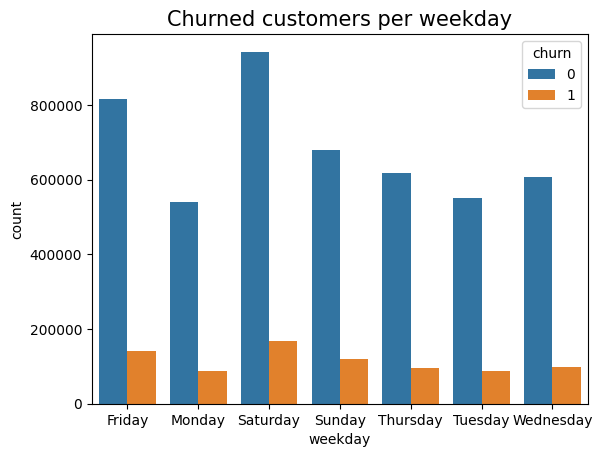

In [ ]:
# The most customers will retain due to Saturday and Sunday rides, the least for Monday ones
sns.countplot(x='weekday', hue='churn', data = df)
plt.title('Churned customers per weekday', fontsize=15, color='black')

array([<Axes: title={'center': 'eta'}>,
       <Axes: title={'center': 'gross_bookings'}>], dtype=object)

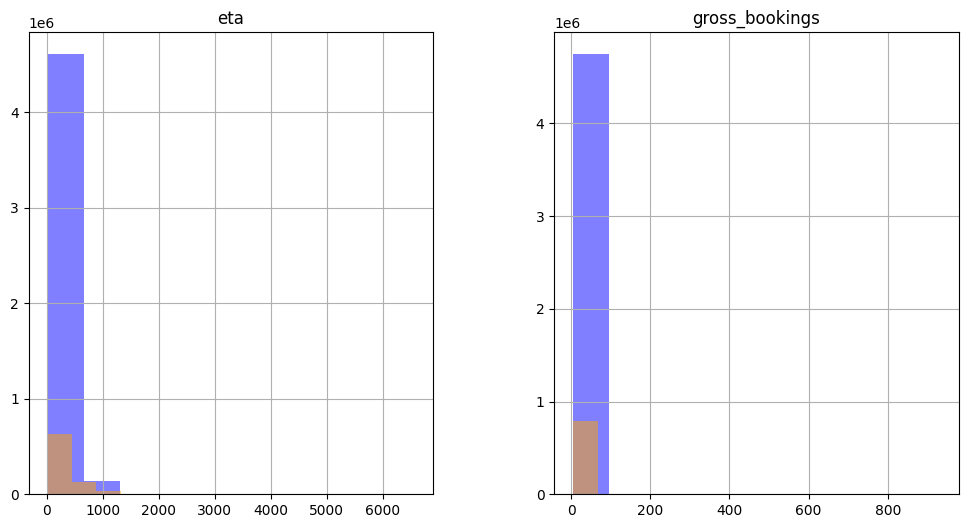

In [ ]:
# The most customers who will retain had eta to approximately 700s whereas those who will churn about 400s
# The most customers who will retain had gross_bookings amout till 800 whereas those who will churn about 600s
numerical_features = ['eta', 'gross_bookings']
fig, ax = plt.subplots(1, 2, figsize=(12,6))
df[df['churn'] == 0][numerical_features].hist(color='blue', alpha=0.5, ax = ax)
df[df['churn'] == 1][numerical_features].hist(color='orange', alpha=0.5, ax = ax)

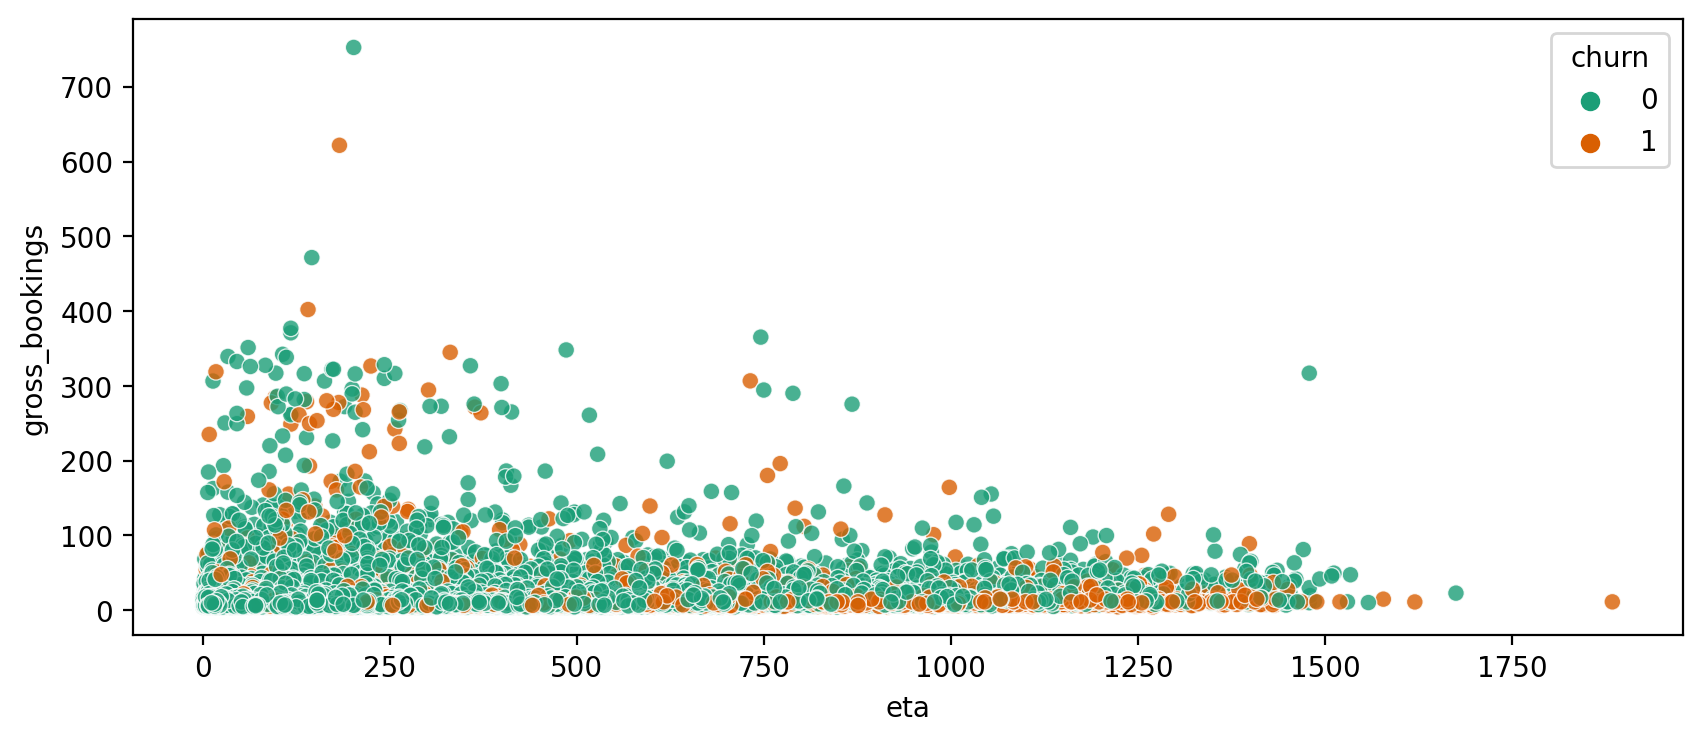

In [ ]:
# Scatter plot of gross_bookings versus eta and color hue by churn, most of churn examples has eta between 1000 and 1500 and gross_bookings between 10 and 50
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data = sample, y = 'gross_bookings', x = 'eta', hue = 'churn', alpha=0.8, palette='Dark2')
plt.show()

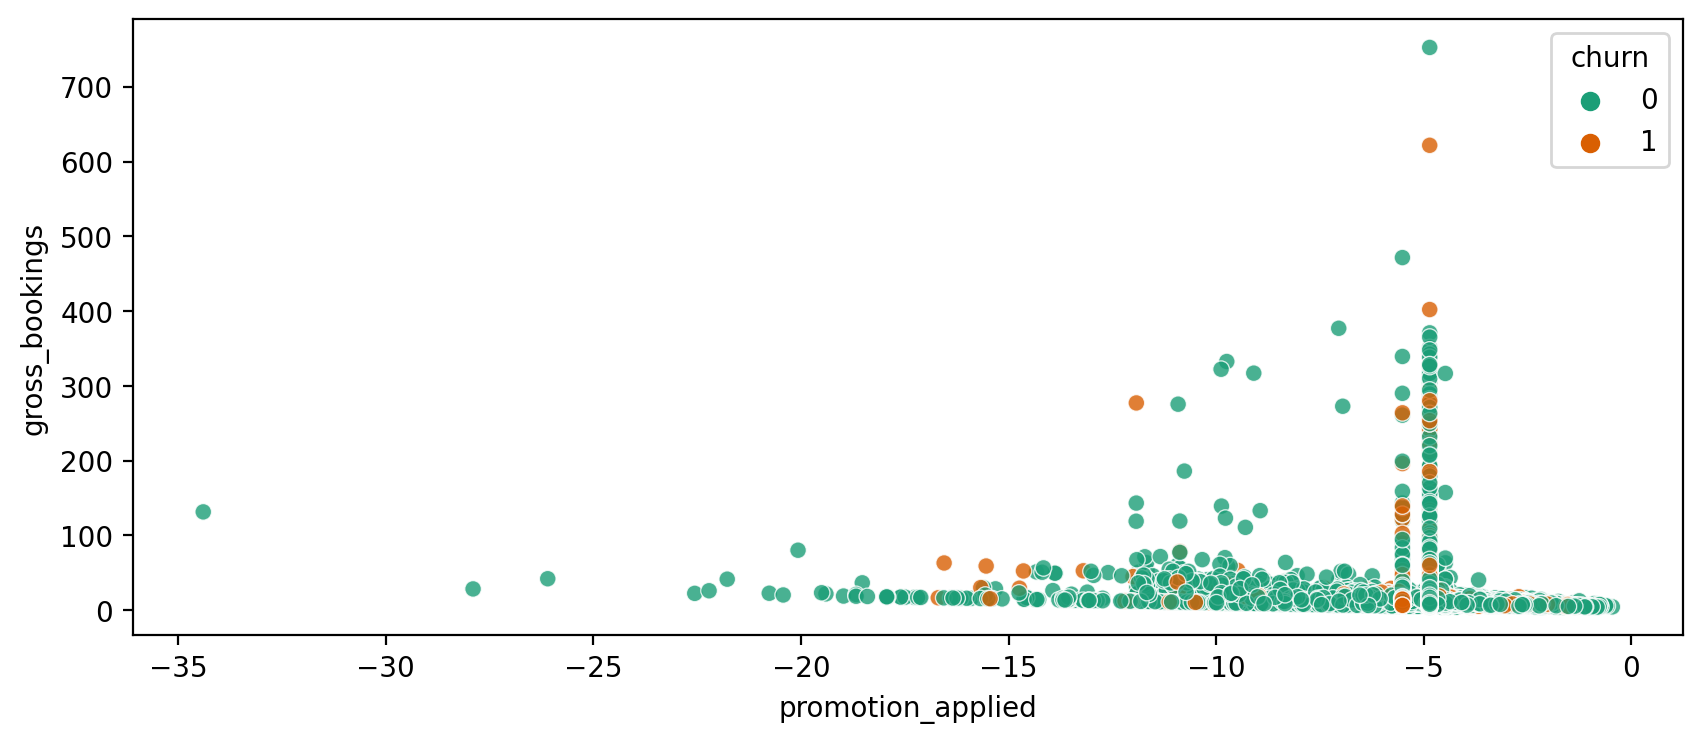

In [ ]:
# Scatter plot of gross_bookings versus promotion_applied and color hue by churn, most of churn examples has promotion_applied between -20 and 0 and gross_bookings between 10 and 100
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data = sample, y = 'gross_bookings', x = 'promotion_applied', hue = 'churn', alpha=0.8, palette='Dark2')
plt.show()

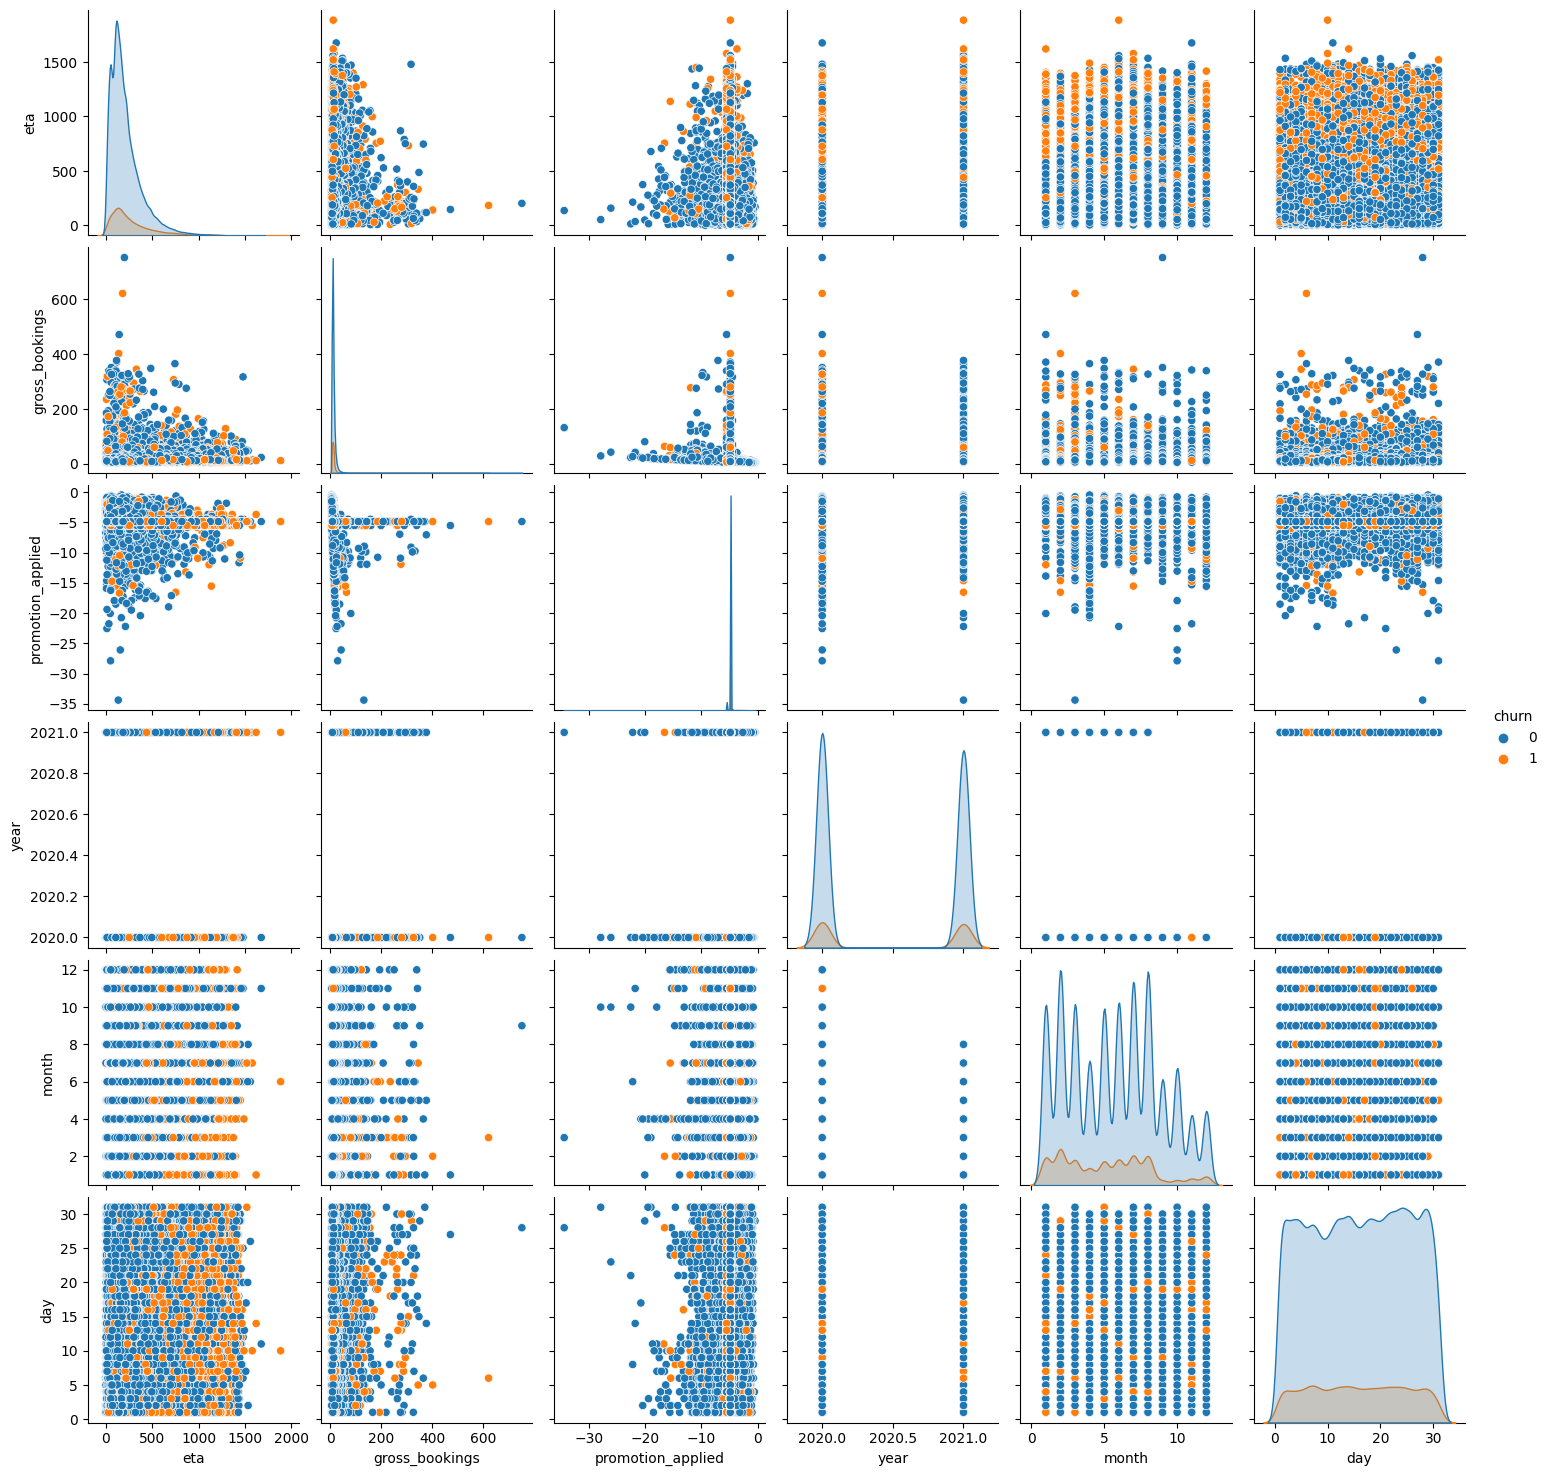

In [ ]:
# Pairplot for all numerical columns with churn as hue
sns.pairplot(sample, hue = 'churn')

<Axes: xlabel='gross_bookings', ylabel='Density'>

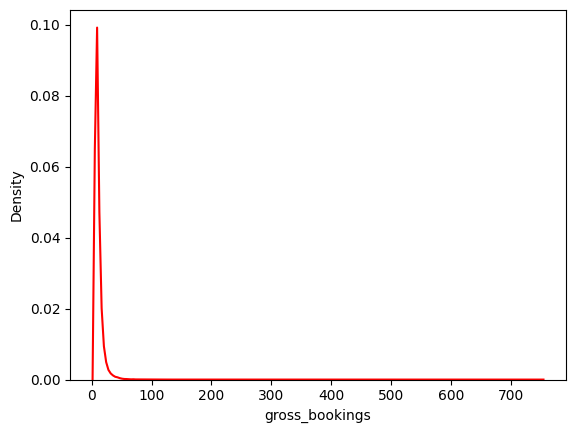

In [ ]:
# Most of rides had gross_bookings amount to 50
sns.kdeplot(sample['gross_bookings'], color='r')

<Axes: xlabel='eta', ylabel='Density'>

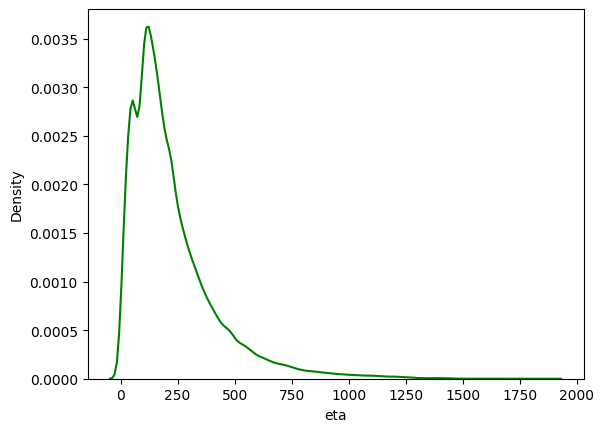

In [ ]:
# Most of rides has eta between 100 and 400
sns.kdeplot(sample['eta'], color='green')

<Axes: xlabel='promotion_applied', ylabel='Density'>

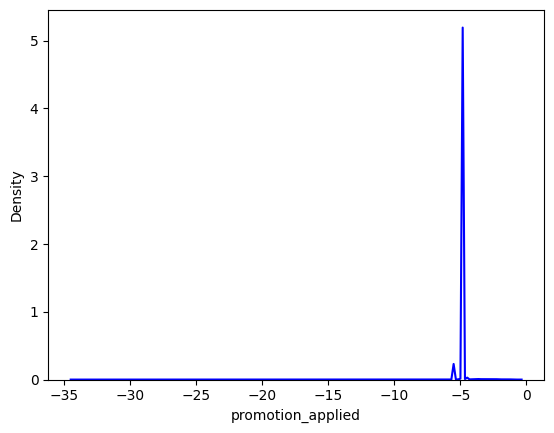

In [ ]:
# Most of rides had promotion_applied between -5 and -4
sns.kdeplot(sample['promotion_applied'], color='blue')

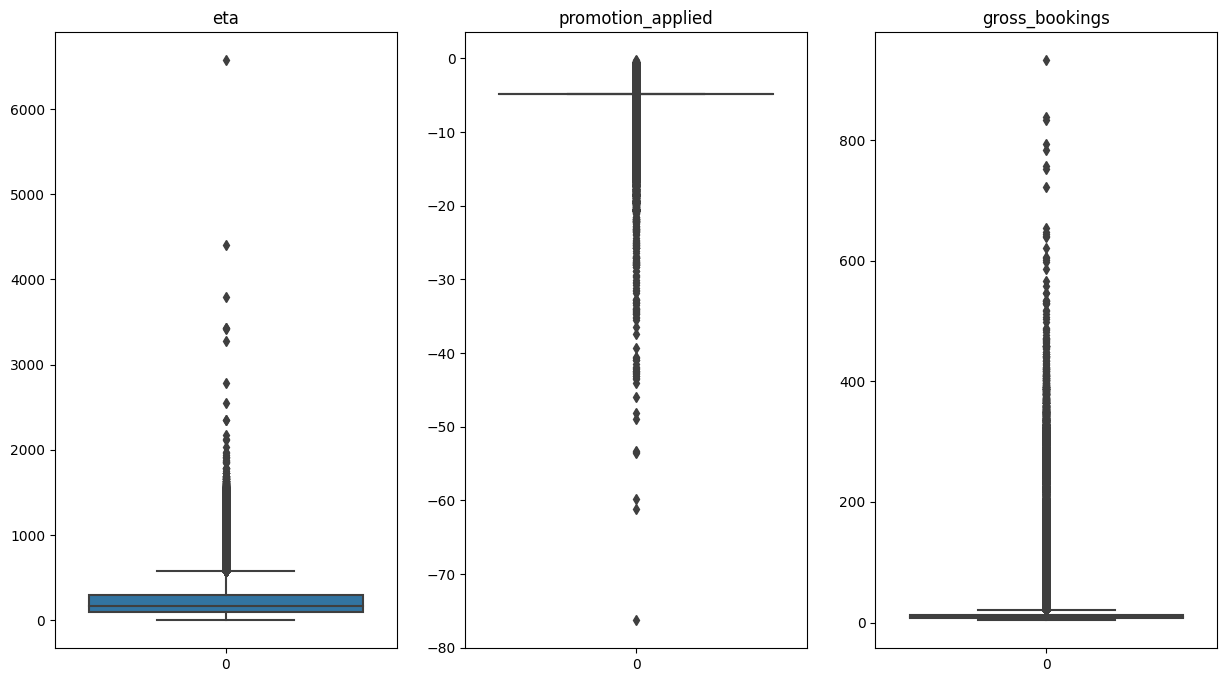

In [ ]:
# Check outliers in data - each numerical column has a lot od outliers
num = []
for col in df.columns:
  if df[col].dtype == np.number:
    num.append(col)
df_num = df[num]
fig, axs = plt.subplots(figsize = (15, 8), ncols=3)
for i in range(len(num)):
  sns.boxplot(df_num[df_num.columns[i]], ax=axs[i]).set_title(num[i])

In [ ]:
# Preparation for removing outliers, calculating quantiles and filtering data
q1_eta = df['eta'].quantile(0.9)
q3_eta = df['eta'].quantile(0.1)
print(q1_eta)
print(q3_eta)
filter1 = df['eta'] > q1_eta
filter2 = df['eta'] < q3_eta
fil = df.where(filter1 & filter2, inplace = False)
fil.dropna().sum(axis = 1)

467.0
48.0


Series([], dtype: float64)

In [ ]:
q1 = df['gross_bookings'].quantile(0.9)
q3 = df['gross_bookings'].quantile(0.1)
print(q1)
print(q3)
filter1 = df['gross_bookings'] > q1
filter2 = df['gross_bookings'] < q3
fil = df.where(filter1 & filter2, inplace = False)
fil.dropna().sum(axis = 1)

17.80458457814992
5.9586382692602005


Series([], dtype: float64)

In [ ]:
q1 = df['promotion_applied'].quantile(0.9)
q3 = df['promotion_applied'].quantile(0.1)
print(q1)
print(q3)
filter1 = df['promotion_applied'] > q1
filter2 = df['promotion_applied'] < q3
fil = df.where(filter1 & filter2, inplace = False)
fil.dropna().sum(axis = 1)

-4.858732165432545
-4.858732165432545


Series([], dtype: float64)

In [ ]:
df.isna().sum()

product_name         0
eta                  0
is_on_time           0
status               0
promotion_applied    0
gross_bookings       0
churn                0
weekday              0
year                 0
month                0
day                  0
dtype: int64

In [ ]:
# Change the type for target variable to numeric
df['churn'] = df['churn'].astype(np.int32)

In [ ]:
# Removing outliers for eta column
df_copy = df.copy()
Q1_eta = df_copy['eta'].quantile(0.05)
Q3_eta = df_copy['eta'].quantile(0.95)
df_copy = df_copy[(df_copy['eta'] < Q3_eta) & (df_copy['eta'] > Q1_eta)]
df_copy.shape

(4987982, 11)

In [ ]:
# Removing outliers for gross_bookings column
Q1_gross = df_copy['gross_bookings'].quantile(0.05)
Q3_gross = df_copy['gross_bookings'].quantile(0.95)
df_copy = df_copy[(df_copy['gross_bookings'] < Q3_gross) & (df_copy['gross_bookings'] > Q1_gross)]
df_copy.shape

(4489180, 11)

# **Modelling preparation**

In [ ]:
# Dataframe with models results
results = pd.DataFrame()
results['Name'] = []
results['Precision train'] = []
results['Recall train'] = []
results['Accuracy train'] = []
results['F1 train'] = []
results['Precision test'] = []
results['Recall test'] = []
results['Accuracy test'] = []
results['F1 test'] = []
results['AUC test'] = []

In [ ]:
# Due to device limitations, for further visualisation analysis only 0.2% rows of data will be considered
sample = df_copy.sample(frac = 0.002)

In [ ]:
# Retrieving columns which will represent independent/dependent variables
X = sample.drop(['churn'], axis = 1)
X = pd.get_dummies(X, drop_first = True)
y = sample[['churn']]

In [ ]:
# The dataset is not well balanced 86% vs 14%
y.value_counts()

churn
0        7667
1        1311
dtype: int64

In [ ]:
# SMOTE method for making dataset well balanced
smote = SMOTE(sampling_strategy = 'not majority')
X_sm, y_sm = smote.fit_resample(X, y)

In [ ]:
# The same amount of examples for target labels - well balanced dataset
y_sm.value_counts()

churn
0        7667
1        7667
dtype: int64

In [ ]:
# Undummified function
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [ ]:
# Turn back to X without dummies because of making pipelines
X_sm = undummify(X_sm)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, shuffle = True, random_state = 111)

In [ ]:
# Feature engineering
num_attr = X_train.select_dtypes(include='number').columns
cat_attr = X_train.select_dtypes(exclude='number').columns

In [ ]:
# Pipelines for different column types and overall pipeline
num_pipeline = Pipeline(
    [
      ('scaler', StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    [
        ('ohe', OneHotEncoder(sparse=False))
    ]
)

cat_num_pipeline = ColumnTransformer(
    [
        ('numerical', num_pipeline, num_attr),
        ('categorical', cat_pipeline, cat_attr)
    ]
)

In [ ]:
cat_num_pipeline

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['eta', 'year', 'month', 'day'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(sparse=False))]),
                                 Index(['promotion', 'gross', 'product', 'is', 'status', 'weekday'], dtype='object'))])

# **Logistic regression**

In [ ]:
# Model definition
lr_param_grid = [
    {
        "lr__penalty": ['l2', 'l1'],
        "lr__C": np.logspace(0, 10, 20),
    }
]
lr_model = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('lr', LogisticRegression(solver = 'saga', max_iter = 500))
    ]
)

In [ ]:
# Model fitting
grid_model_lr = GridSearchCV(lr_model, param_grid = lr_param_grid, cv=5, scoring='accuracy')
grid_model_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cat_num_pipeline',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['eta', 'year', 'month', 'day'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         Index(['promotion', 'gross', 'product', 'is', 'status', 'weekday'], dtype='objec...
             param_grid=[{'lr__C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                          'lr__penalty': ['l2', 'l1']}],
             scoring='accuracy')

In [ ]:
# Best model parameters
lr_penalty = grid_model_lr.best_params_['lr__penalty']
lr_C = grid_model_lr.best_params_['lr__C']

In [ ]:
# Best model details
model_1 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('lr', LogisticRegression(solver = 'saga', max_iter = 500, penalty = lr_penalty, C = lr_C))
    ]
)

In [ ]:
# Best model fitting
model_1.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['eta', 'year', 'month', 'day'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['promotion', 'gross', 'product', 'is', 'status', 'weekday'], dtype='object'))])),
                ('lr', LogisticRegression(max_iter=500, solver='saga'))])

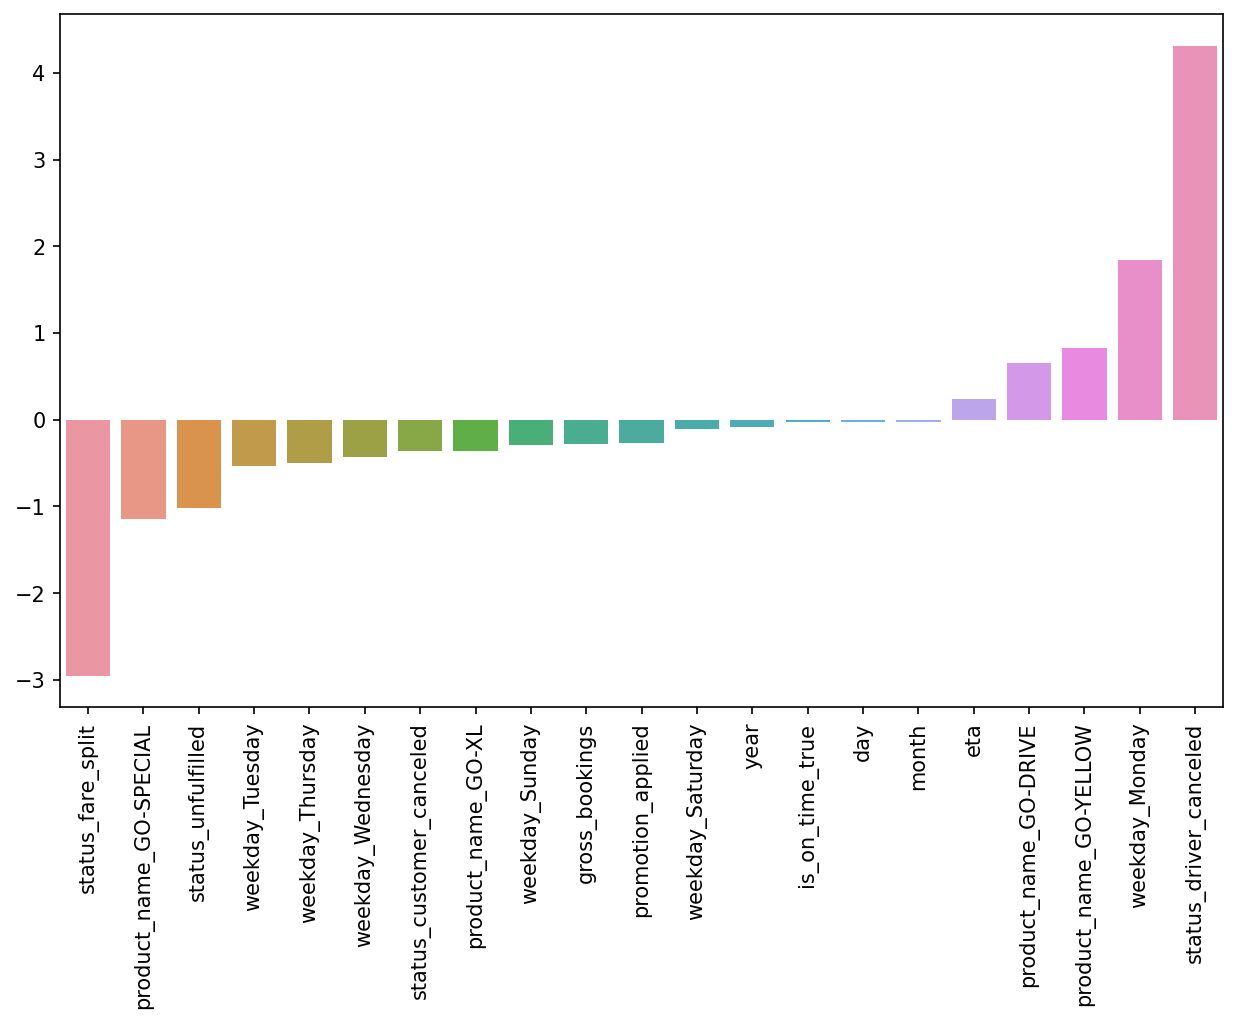

In [ ]:
# Coefficient vizualisation with sorting
coefs = pd.Series(index = X.columns, data = model_1['lr'].coef_[0])
coefs = coefs.sort_values()
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation = 90)
plt.show()

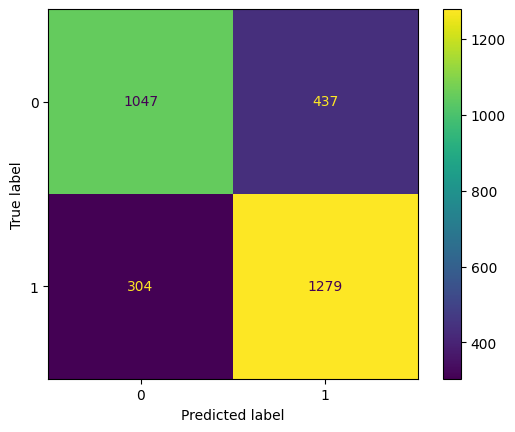

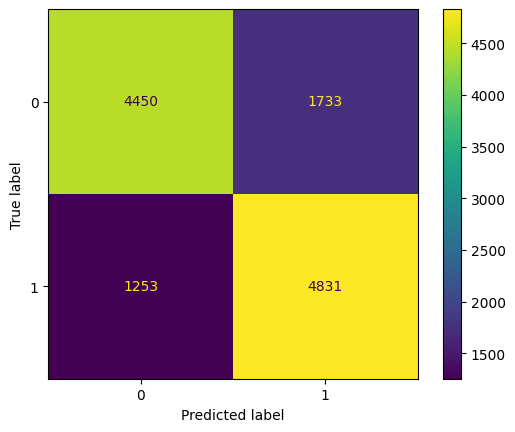

In [ ]:
# Model performance evaluation for test and train set
y_pred = model_1.predict(X_test)
y_pred_tr = model_1.predict(X_train)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_1, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_1, X_train, y_train)

In [ ]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1484
           1       0.75      0.81      0.78      1583

    accuracy                           0.76      3067
   macro avg       0.76      0.76      0.76      3067
weighted avg       0.76      0.76      0.76      3067



In [ ]:
# Classification report for train set
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      6183
           1       0.74      0.79      0.76      6084

    accuracy                           0.76     12267
   macro avg       0.76      0.76      0.76     12267
weighted avg       0.76      0.76      0.76     12267



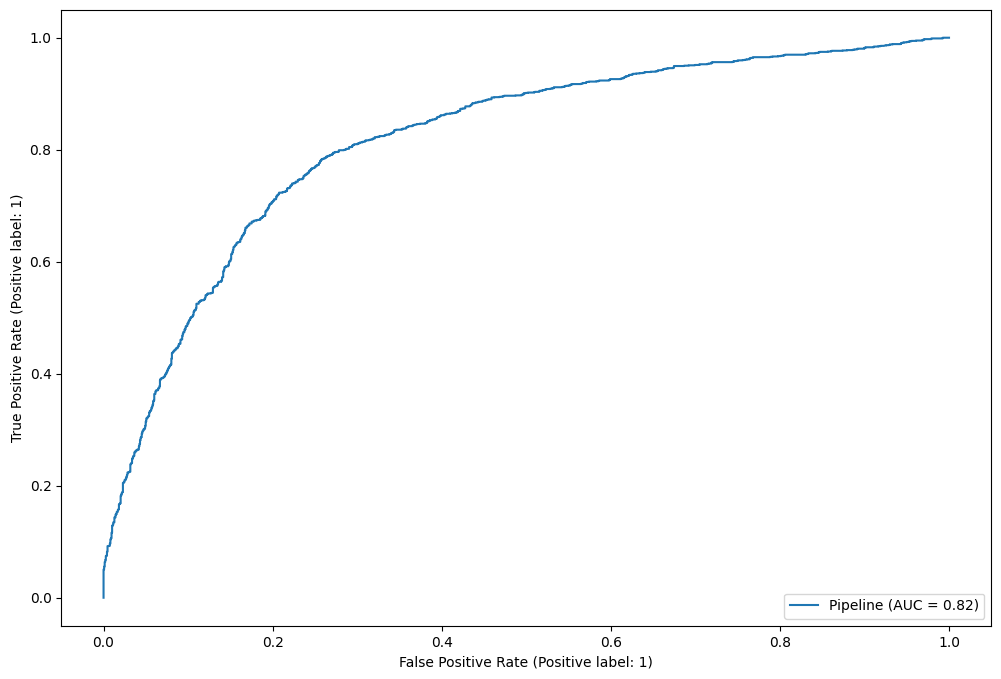

In [ ]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_1, X_test, y_test, ax = ax)
plt.show()

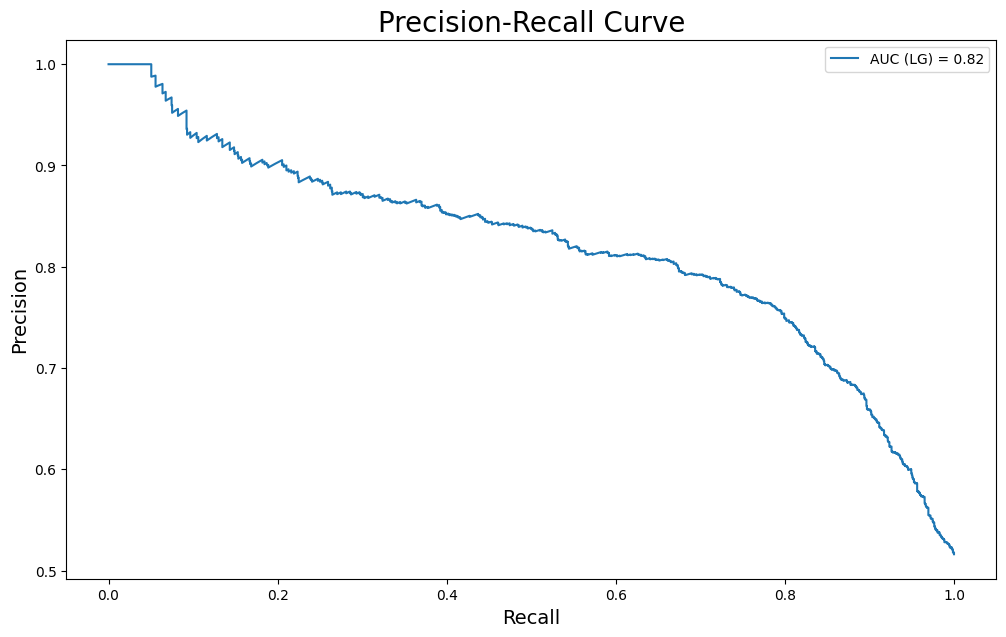

In [ ]:
# Precision-Recall curve
y_scores = model_1.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
auc_1 = metrics.auc(recall, precision)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'AUC (LG) = {auc_1:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

In [ ]:
# Save model results for summary
results.loc[len(results.index)] = ['Logistic regression', precision_score(y_train, y_pred_tr), recall_score(y_train, y_pred_tr), accuracy_score(y_train, y_pred_tr), f1_score(y_train, y_pred_tr),
                                   precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), auc_1]

# **KNN**


In [ ]:
# Model definition
knn_param_grid = [
    {
        "knn__n_neighbors": list(range(1,20))
    }
]
knn_model = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('knn', KNeighborsClassifier())
    ]
)

In [ ]:
# Model fitting
grid_model_knn = GridSearchCV(knn_model, param_grid = knn_param_grid, cv=5, scoring='accuracy')
grid_model_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cat_num_pipeline',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['eta', 'year', 'month', 'day'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         Index(['promotion', 'gross', 'product', 'is', 'status', 'weekday'], dtype='object'))])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19]}],
             scoring='accuracy')

In [ ]:
# Best model parameters
knn_neigh = grid_model_knn.best_params_['knn__n_neighbors']
knn_neigh

1

In [ ]:
# Model definition with 18 recommended neighbors
model_2 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('knn', KNeighborsClassifier(n_neighbors = knn_neigh))
    ]
)

In [ ]:
# Model fitting
model_2.fit(X_train,y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['eta', 'year', 'month', 'day'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['promotion', 'gross', 'product', 'is', 'status', 'weekday'], dtype='object'))])),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

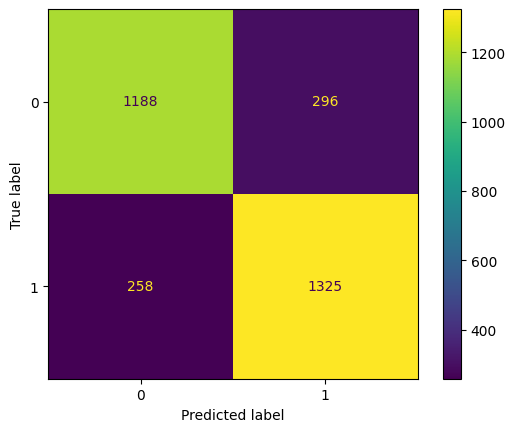

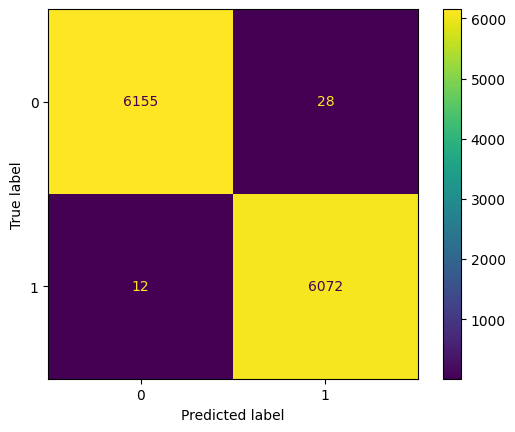

In [ ]:
# Model performance evaluation for test and train set
y_pred = model_2.predict(X_test)
y_pred_tr = model_2.predict(X_train)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_2, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_2, X_train, y_train)

In [ ]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1484
           1       0.82      0.84      0.83      1583

    accuracy                           0.82      3067
   macro avg       0.82      0.82      0.82      3067
weighted avg       0.82      0.82      0.82      3067



In [ ]:
# Classification report for train set
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6183
           1       1.00      1.00      1.00      6084

    accuracy                           1.00     12267
   macro avg       1.00      1.00      1.00     12267
weighted avg       1.00      1.00      1.00     12267



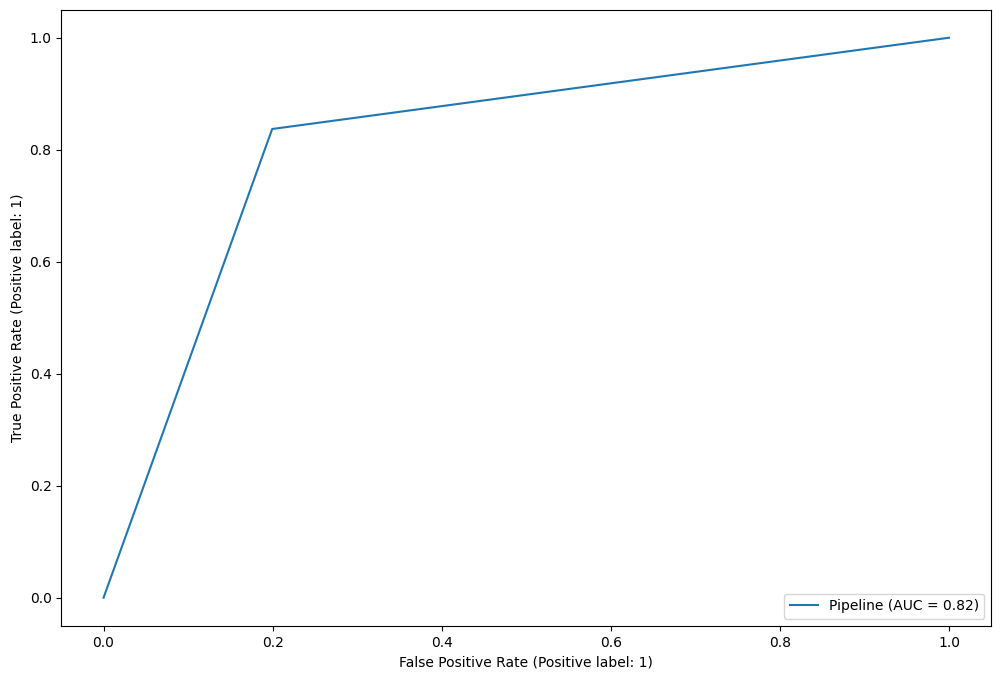

In [ ]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_2, X_test, y_test, ax = ax)
plt.show()

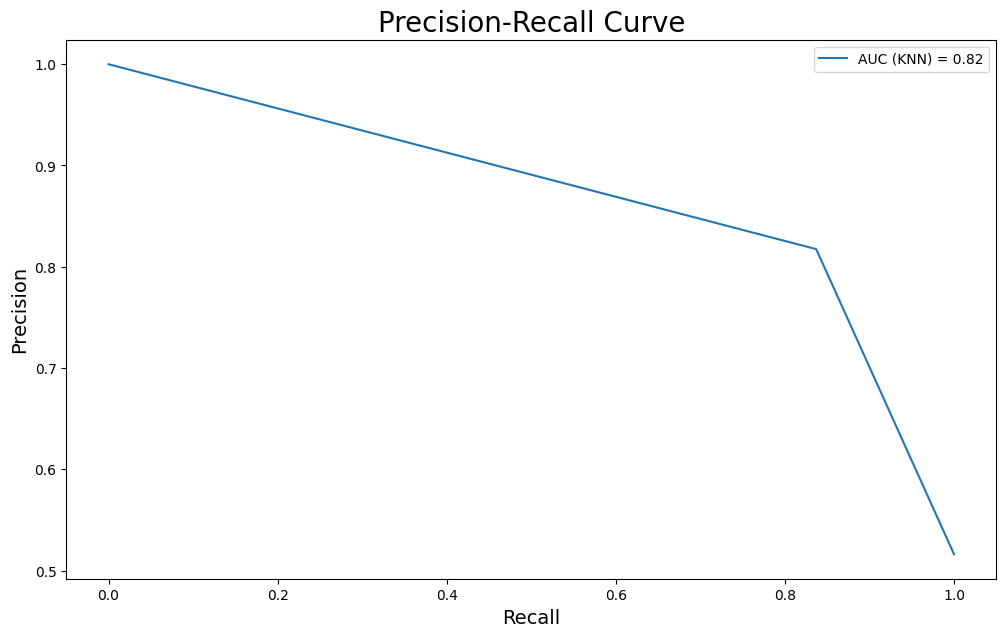

In [ ]:
# Precision-Recall curve
y_scores = model_2.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
auc_2 = metrics.auc(recall, precision)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'AUC (KNN) = {auc_1:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

In [ ]:
# Save model results for summary
results.loc[len(results.index)] = ['KNN', precision_score(y_train, y_pred_tr), recall_score(y_train, y_pred_tr), accuracy_score(y_train, y_pred_tr), f1_score(y_train, y_pred_tr),
                                   precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), auc_2]

# **SVM**

In [ ]:
# Model definition
svc_param_grid = {
    "svc__kernel": ['linear'],
    "svc__gamma": ['scale', 'auto']
}

svc_model = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('svc', SVC(probability = True))
    ]
)

In [ ]:
# Model fitting
grid_model_svc = GridSearchCV(svc_model, param_grid = svc_param_grid, cv=5, scoring='accuracy')
grid_model_svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cat_num_pipeline',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['eta', 'year', 'month', 'day'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         Index(['promotion', 'gross', 'product', 'is', 'status', 'weekday'], dtype='object'))])),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear']},
             scoring='accuracy')

In [ ]:
# Best model parameters
svc_kernel = grid_model_svc.best_params_['svc__kernel']
svc_gamma = grid_model_svc.best_params_['svc__gamma']

In [ ]:
# Best model details
model_3 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('svc', SVC(probability = True, kernel = svc_kernel, gamma = svc_gamma))
    ]
)

In [ ]:
# Best model fitting
model_3.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['eta', 'year', 'month', 'day'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['promotion', 'gross', 'product', 'is', 'status', 'weekday'], dtype='object'))])),
                ('svc', SVC(kernel='linear', probability=True))])

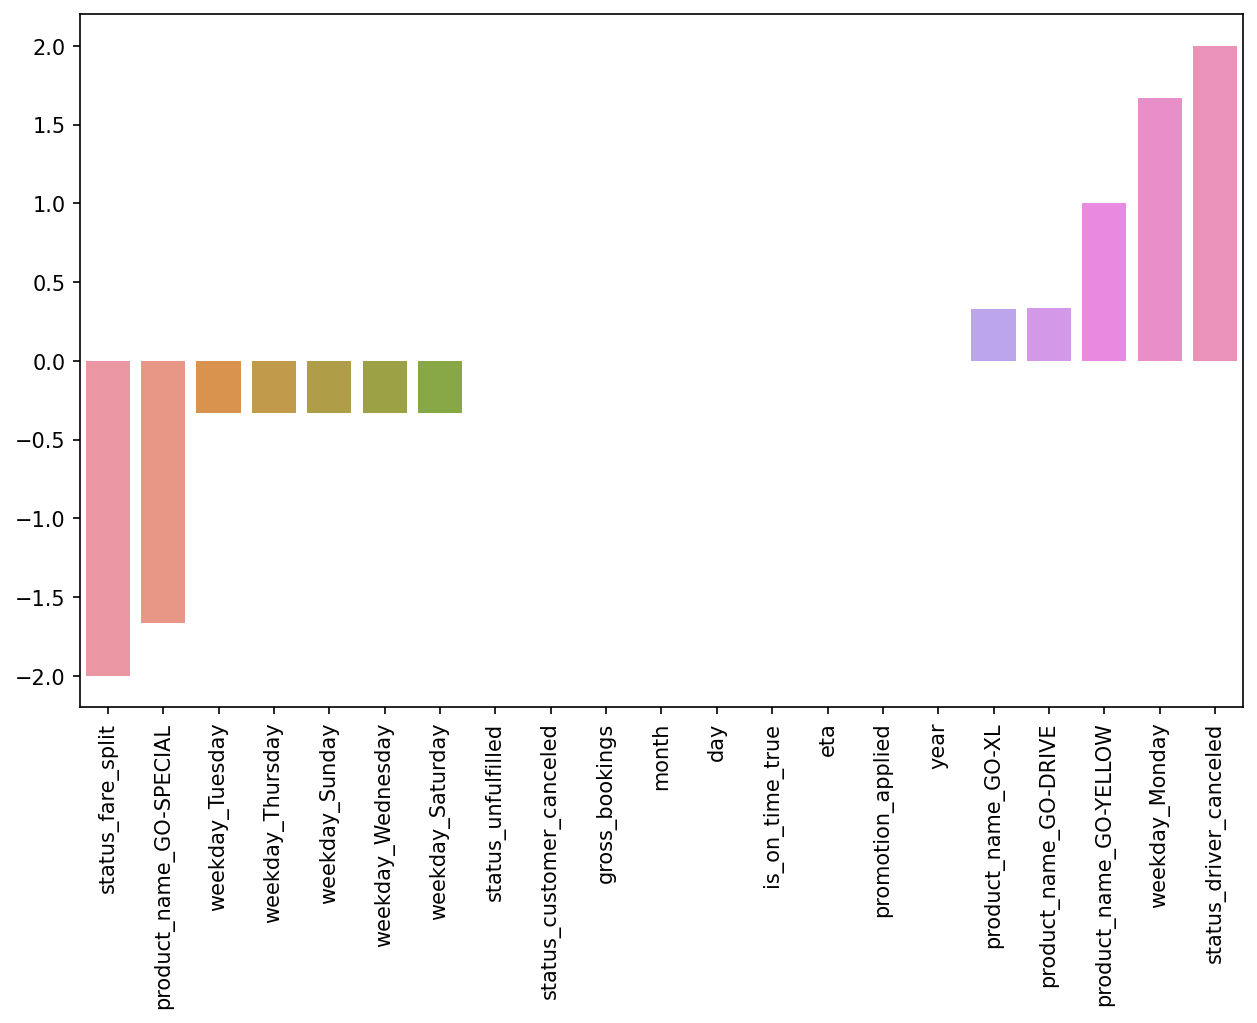

In [ ]:
# Coefficient vizualisation with sorting
coefs = pd.Series(index = X.columns, data = model_3['svc'].coef_[0])
coefs = coefs.sort_values()
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation = 90)
plt.show()

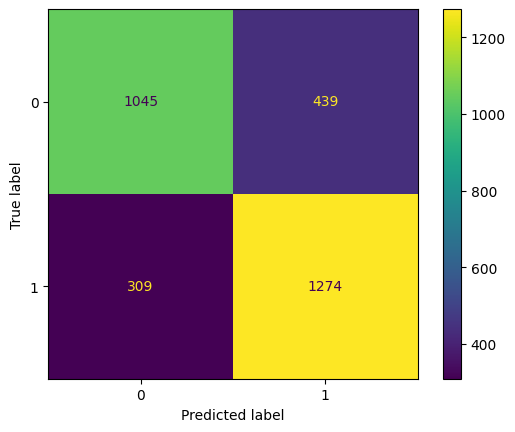

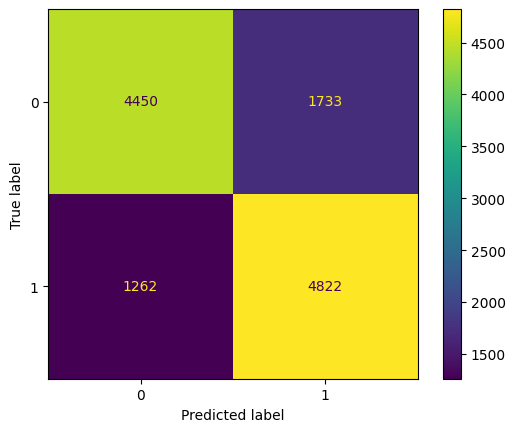

In [ ]:
# Model performance evaluation for test and train set
y_pred = model_3.predict(X_test)
y_pred_tr = model_3.predict(X_train)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_3, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_3, X_train, y_train)

In [ ]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.74      1484
           1       0.74      0.80      0.77      1583

    accuracy                           0.76      3067
   macro avg       0.76      0.75      0.75      3067
weighted avg       0.76      0.76      0.76      3067



In [ ]:
# Classification report for train set
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      6183
           1       0.74      0.79      0.76      6084

    accuracy                           0.76     12267
   macro avg       0.76      0.76      0.76     12267
weighted avg       0.76      0.76      0.76     12267



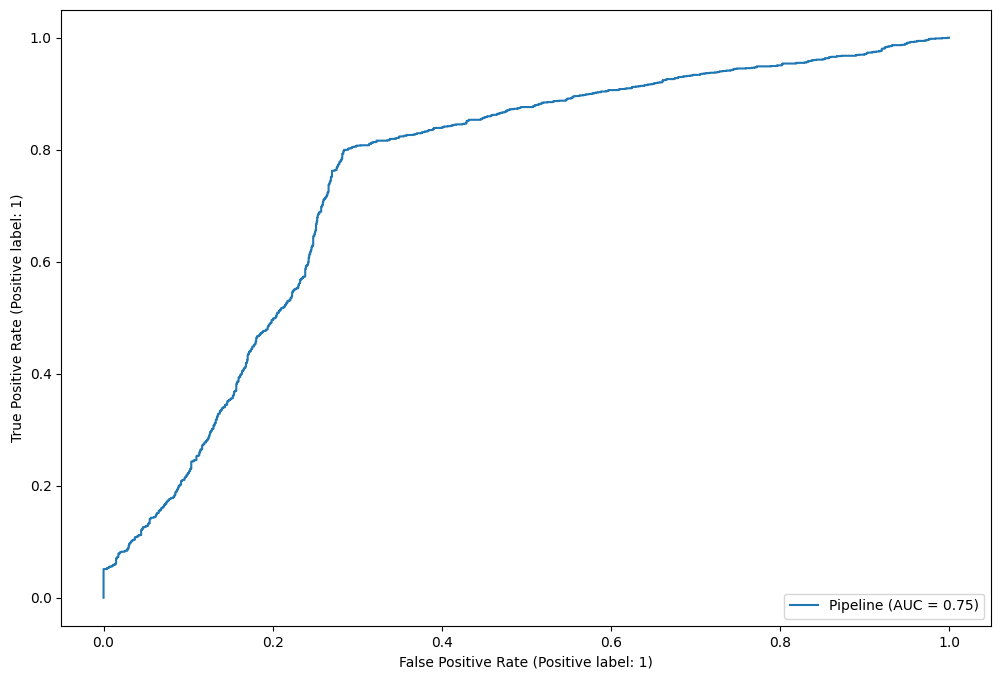

In [ ]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_3, X_test, y_test, ax = ax)
plt.show()

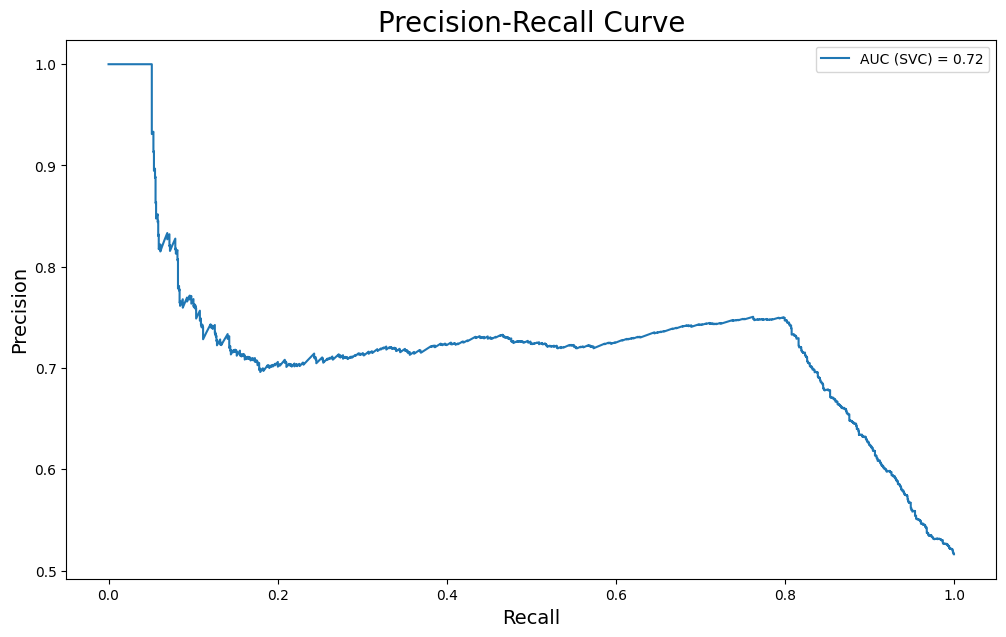

In [ ]:
# Precision-Recall curve
y_scores = model_3.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
auc_3 = metrics.auc(recall, precision)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'AUC (SVC) = {auc_1:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

In [ ]:
# Save model results for summary
results.loc[len(results.index)] = ['SVC', precision_score(y_train, y_pred_tr), recall_score(y_train, y_pred_tr), accuracy_score(y_train, y_pred_tr), f1_score(y_train, y_pred_tr),
                                   precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), auc_3]

# **Decision tree**

In [ ]:
# Model definition
tree_param_grid = [{"model__criterion": ['gini', 'entropy'],
              "model__max_depth": [2, 3, 4, 5],
              "model__max_leaf_nodes": [2, 3, 4, 5],
              "model__min_samples_leaf": range(1, 5)
              }]
tree_model = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('model', DecisionTreeClassifier())
    ]
)

In [ ]:
# Model fitting
grid_model_4 = GridSearchCV(tree_model, param_grid = tree_param_grid, verbose=1, n_jobs=1, cv=5, scoring='accuracy')
grid_model_4.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cat_num_pipeline',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['eta', 'year', 'month', 'day'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         Index(['promotion', 'gross', 'product', 'is', 'status', 'weekday'], dtype='object'))])),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=1,
             param_grid=[{'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [2, 3, 4, 5],
                          'model__max_leaf_nodes': [2, 3, 4, 5],
                          'model__min_samples_leaf': range(1, 5)}],
             scoring='accuracy', verbose=1)

In [ ]:
# Best model parameters
tree_criterion = grid_model_4.best_params_['model__criterion']
tree_depth = grid_model_4.best_params_['model__max_depth']
tree_leaf_max = grid_model_4.best_params_['model__max_leaf_nodes']
tree_leaf_min = grid_model_4.best_params_['model__min_samples_leaf']

In [ ]:
# Best model details
model_4 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('tree', DecisionTreeClassifier(criterion=tree_criterion, max_depth=tree_depth, max_leaf_nodes=tree_leaf_max, min_samples_leaf=tree_leaf_min, class_weight='balanced'))
    ]
)

In [ ]:
# Model fitting
model_4.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['eta', 'year', 'month', 'day'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['promotion', 'gross', 'product', 'is', 'status', 'weekday'], dtype='object'))])),
                ('tree',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=2,
                                        max_leaf_nodes=2))])

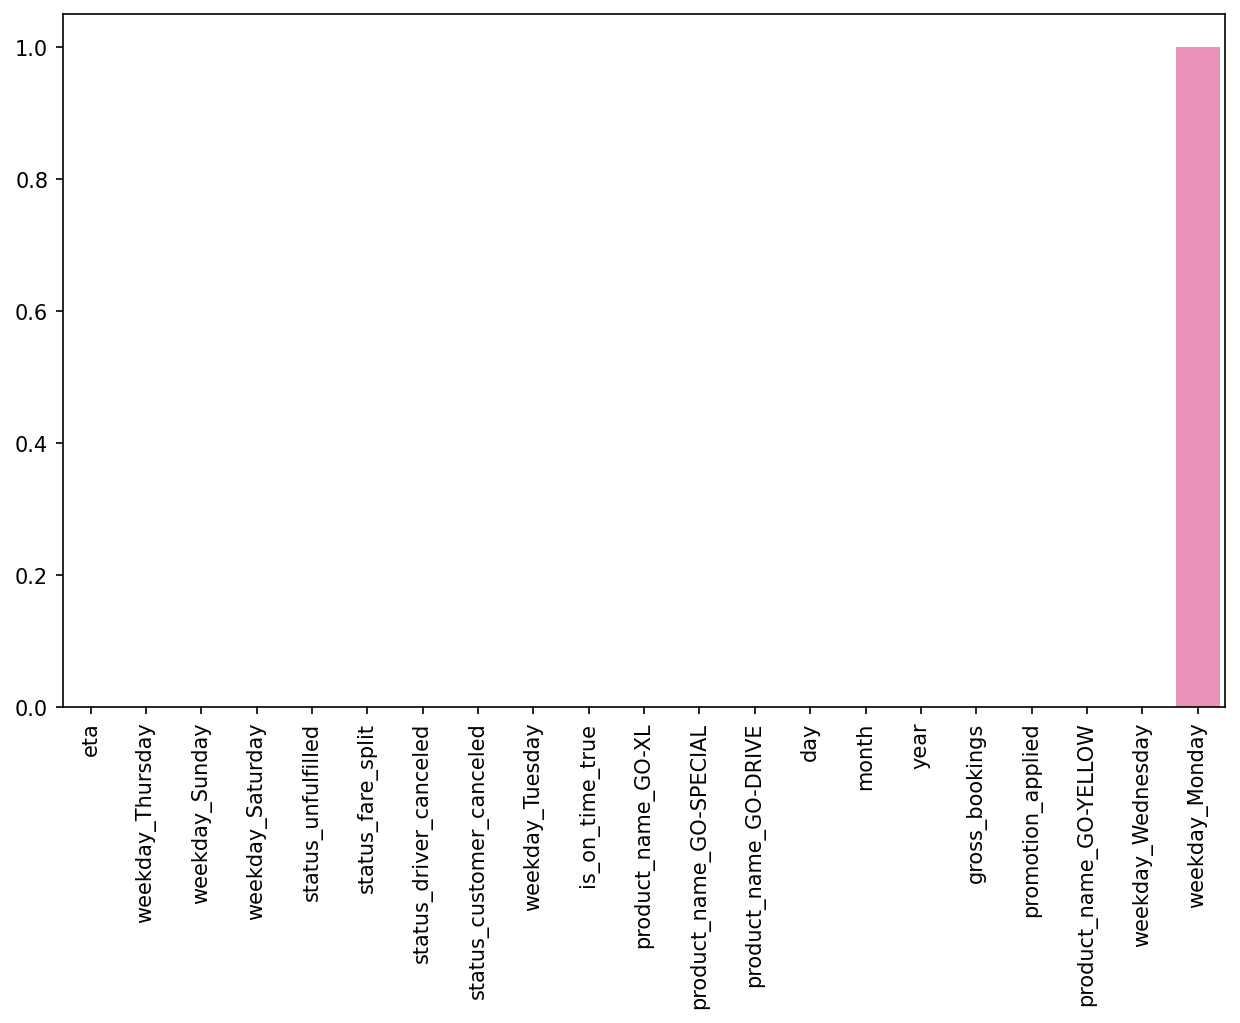

In [ ]:
# Coefficient vizualisation with sorting
coefs = pd.Series(index = X.columns, data = model_4['tree'].feature_importances_)
coefs = coefs.sort_values()
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation = 90)
plt.show()

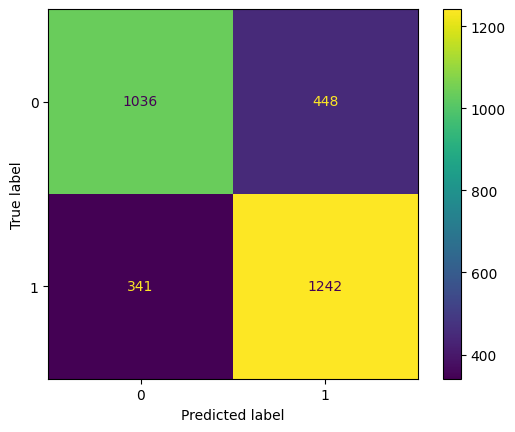

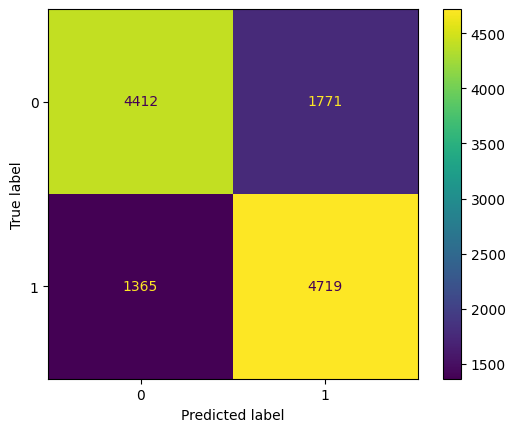

In [ ]:
# Model performance evaluation for test and train set
y_pred = model_4.predict(X_test)
y_pred_tr = model_4.predict(X_train)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_4, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_4, X_train, y_train)

In [ ]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72      1484
           1       0.73      0.78      0.76      1583

    accuracy                           0.74      3067
   macro avg       0.74      0.74      0.74      3067
weighted avg       0.74      0.74      0.74      3067



In [ ]:
# Classification report for train set
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       0.76      0.71      0.74      6183
           1       0.73      0.78      0.75      6084

    accuracy                           0.74     12267
   macro avg       0.75      0.74      0.74     12267
weighted avg       0.75      0.74      0.74     12267



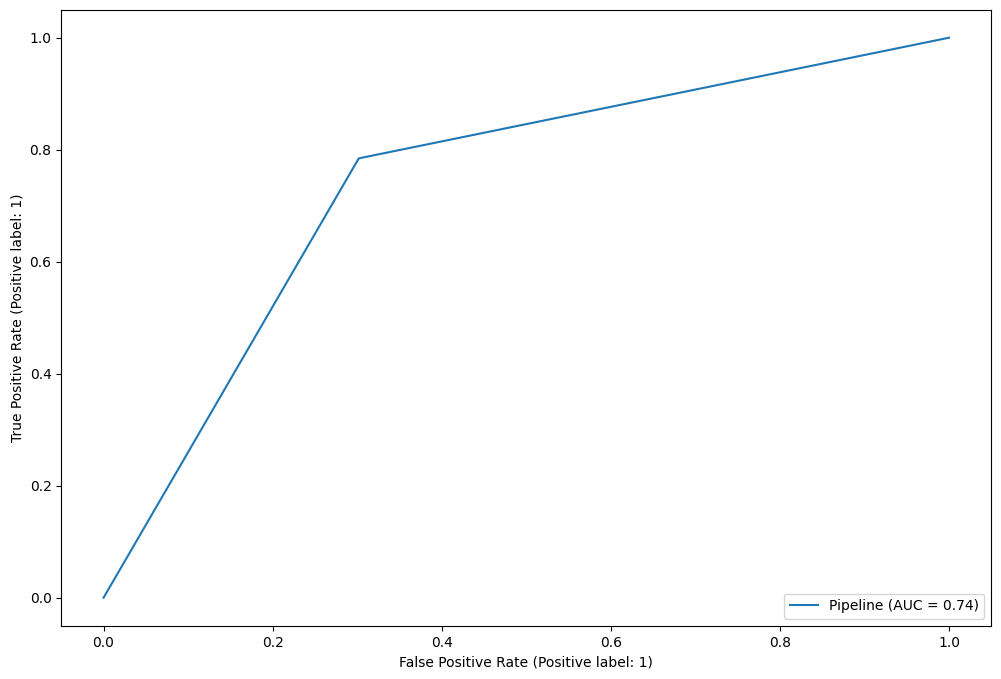

In [ ]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_4, X_test, y_test, ax = ax)
plt.show()

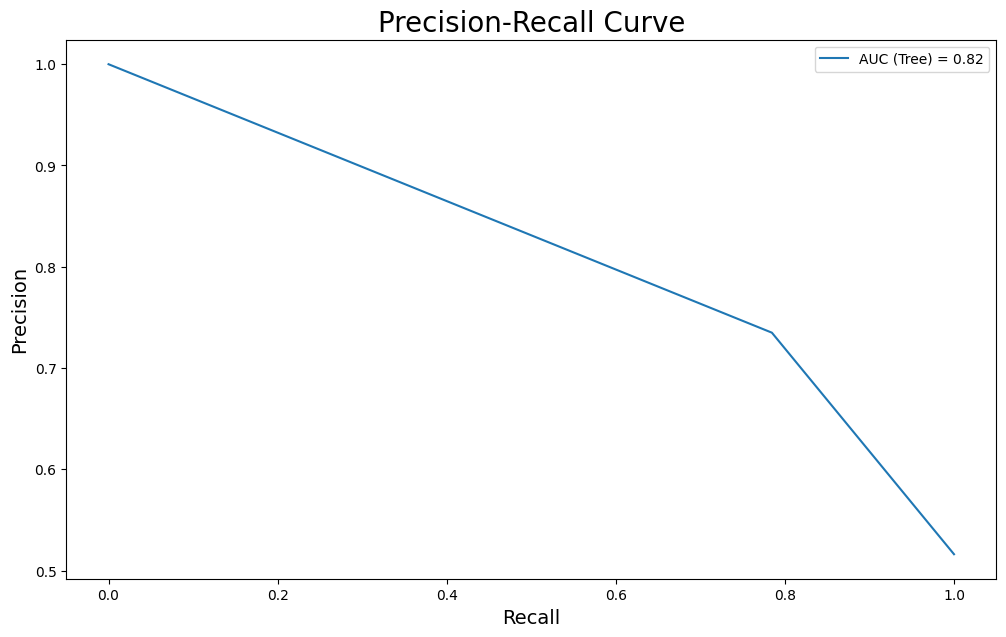

In [ ]:
# Precision-Recall curve
y_scores = model_4.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
auc_4 = metrics.auc(recall, precision)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'AUC (Tree) = {auc_4:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

In [ ]:
# Save model results for summary
results.loc[len(results.index)] = ['Tree', precision_score(y_train, y_pred_tr), recall_score(y_train, y_pred_tr), accuracy_score(y_train, y_pred_tr), f1_score(y_train, y_pred_tr),
                                   precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), auc_4]

# **Random Forest**

In [ ]:
# Model definition
rfc_param_grid = {'rfc__criterion': ['gini', 'entropy', 'log_loss'],
             'rfc__oob_score': [True, False],
            'rfc__max_features': ['sqrt', 'log2']}
rfc_model = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('rfc', RandomForestClassifier())
    ]
)

In [ ]:
# Model fitting
grid_model_rfc = GridSearchCV(rfc_model, param_grid = rfc_param_grid, cv=5, scoring='accuracy')
grid_model_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cat_num_pipeline',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['eta', 'year', 'month', 'day'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         Index(['promotion', 'gross', 'product', 'is', 'status', 'weekday'], dtype='object'))])),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'rfc__criterion': ['gini', 'entropy', 'log_loss'],
                         'rfc__max_features': ['sqrt', 'log2'],
                         'rfc__oob_score': [True, False]},
             scoring='accuracy')

In [ ]:
# Model parameters
grid_model_rfc.best_estimator_.get_params()

{'memory': None,
 'steps': [('cat_num_pipeline',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    Index(['eta', 'year', 'month', 'day'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('ohe',
                                                     OneHotEncoder(sparse=False))]),
                                    Index(['promotion', 'gross', 'product', 'is', 'status', 'weekday'], dtype='object'))])),
  ('rfc', RandomForestClassifier(oob_score=True))],
 'verbose': False,
 'cat_num_pipeline': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  Index(['eta', 'year', 'month', 'day'], dtype='object')),
                                 ('categorical',
                                  Pipeline(s

In [ ]:
# Best model parameters
rfc_criterion = grid_model_rfc.best_params_['rfc__criterion']
rfc_oob_score = grid_model_rfc.best_params_['rfc__oob_score']
rfc_max_features = grid_model_rfc.best_params_['rfc__max_features']

In [ ]:
# Best model details
model_5 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('rfc', RandomForestClassifier(criterion = rfc_criterion, oob_score = rfc_oob_score, max_features = rfc_max_features))
    ]
)

In [ ]:
# Best model fitting
model_5.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['eta', 'year', 'month', 'day'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['promotion', 'gross', 'product', 'is', 'status', 'weekday'], dtype='object'))])),
                ('rfc', RandomForestClassifier(oob_score=True))])

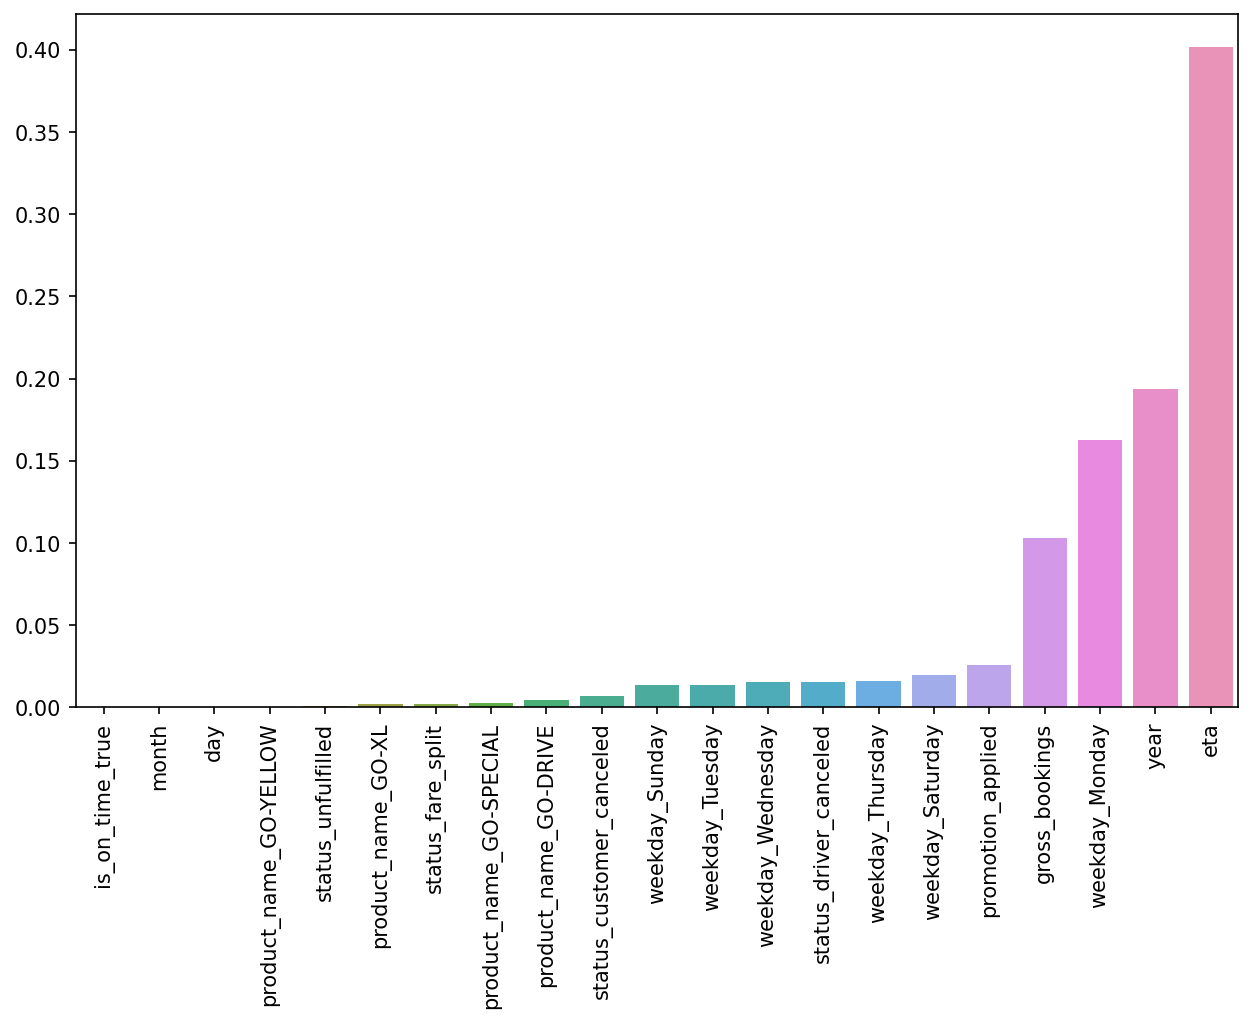

In [ ]:
# Coefficient vizualisation with sorting
coefs = pd.Series(index = X.columns, data = model_5['rfc'].feature_importances_)
coefs = coefs.sort_values()
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation = 90)
plt.show()

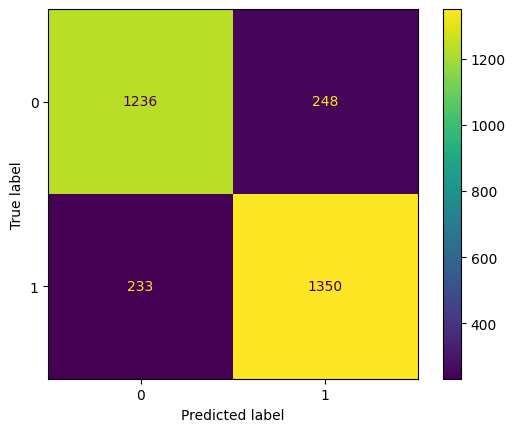

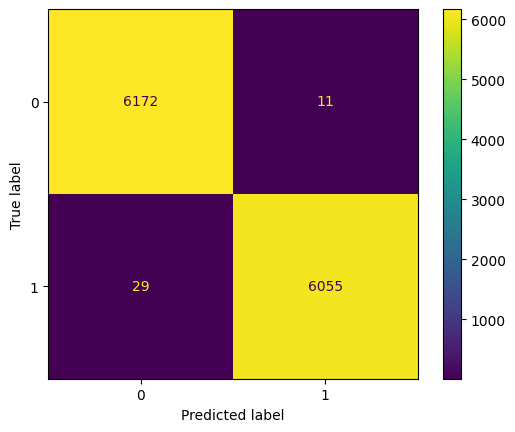

In [ ]:
# Model performance evaluation for test and train set
y_pred = model_5.predict(X_test)
y_pred_tr = model_5.predict(X_train)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_5, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_5, X_train, y_train)

In [ ]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1484
           1       0.84      0.85      0.85      1583

    accuracy                           0.84      3067
   macro avg       0.84      0.84      0.84      3067
weighted avg       0.84      0.84      0.84      3067



In [ ]:
# Classification report for train set
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6183
           1       1.00      1.00      1.00      6084

    accuracy                           1.00     12267
   macro avg       1.00      1.00      1.00     12267
weighted avg       1.00      1.00      1.00     12267



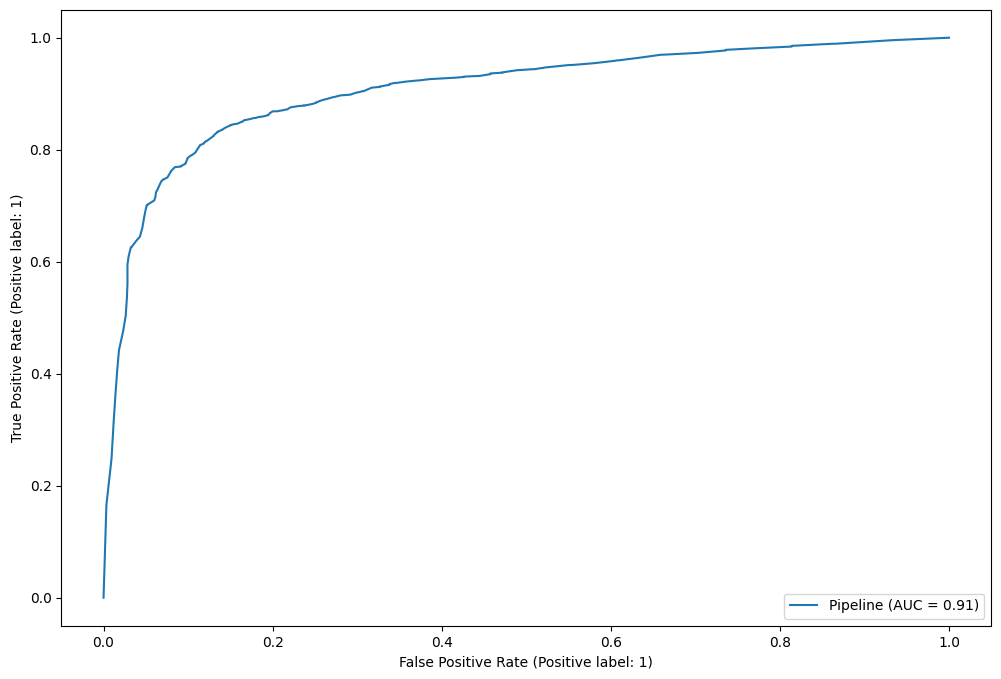

In [ ]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_5, X_test, y_test, ax = ax)
plt.show()

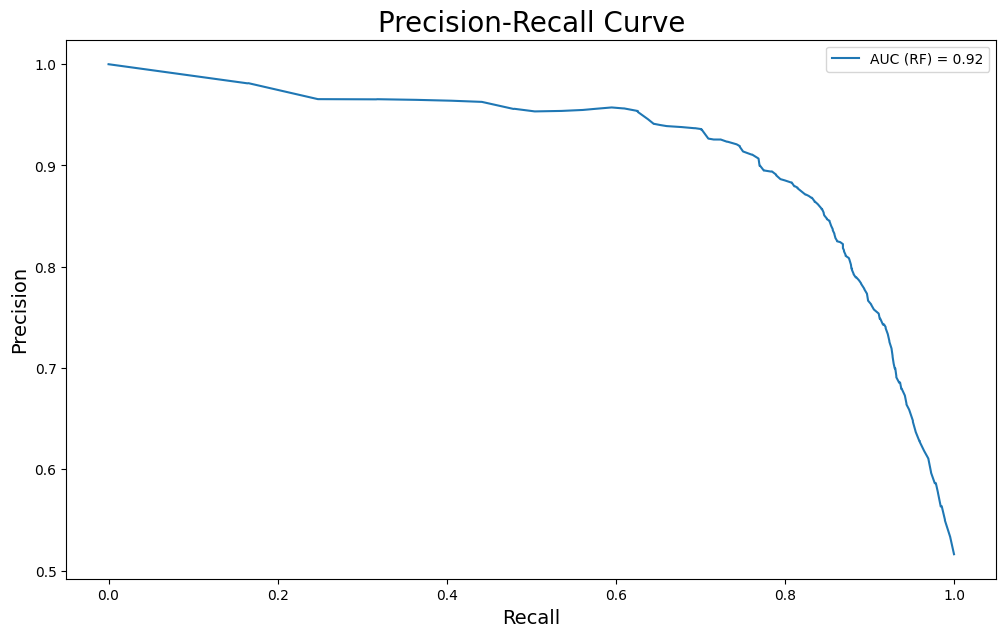

In [ ]:
# Precision-Recall curve
y_scores = model_5.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
auc_5 = metrics.auc(recall, precision)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'AUC (RF) = {auc_5:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

In [ ]:
# Save model results for summary
results.loc[len(results.index)] = ['Random forest', precision_score(y_train, y_pred_tr), recall_score(y_train, y_pred_tr), accuracy_score(y_train, y_pred_tr), f1_score(y_train, y_pred_tr),
                                   precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), auc_5]

# **AdaBoost**

In [ ]:
# Model definition
abc_param_grid = {'abc__learning_rate': [0.1, 0.5, 0.9],
             'abc__algorithm': ['SAMME', 'SAMME.R']}
abc_model = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('abc', AdaBoostClassifier())
    ]
)

In [ ]:
# Model fitting
grid_model_abc = GridSearchCV(abc_model, param_grid = abc_param_grid, cv=5, scoring='accuracy')
grid_model_abc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cat_num_pipeline',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['eta', 'year', 'month', 'day'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         Index(['promotion', 'gross', 'product', 'is', 'status', 'weekday'], dtype='object'))])),
                                       ('abc', AdaBoostClassifier())]),
             param_grid={'abc__algorithm': ['SAMME', 'SAMME.R'],
                         'abc__learning_rate': [0.1, 0.5, 0.9]},
             scoring='accuracy')

In [ ]:
# Model parameters
grid_model_abc.best_estimator_.get_params()

{'memory': None,
 'steps': [('cat_num_pipeline',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    Index(['eta', 'year', 'month', 'day'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('ohe',
                                                     OneHotEncoder(sparse=False))]),
                                    Index(['promotion', 'gross', 'product', 'is', 'status', 'weekday'], dtype='object'))])),
  ('abc', AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1))],
 'verbose': False,
 'cat_num_pipeline': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  Index(['eta', 'year', 'month', 'day'], dtype='object')),
                                 ('categorical',
                          

In [ ]:
# Best model parameters
abc_learning_rate = grid_model_abc.best_params_['abc__learning_rate']
abc_algorithm = grid_model_abc.best_params_['abc__algorithm']

In [ ]:
# Best model details
model_6 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('abc', AdaBoostClassifier(learning_rate = abc_learning_rate, algorithm = abc_algorithm))
    ]
)

In [ ]:
# Best model fitting
model_6.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['eta', 'year', 'month', 'day'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['promotion', 'gross', 'product', 'is', 'status', 'weekday'], dtype='object'))])),
                ('abc',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1))])

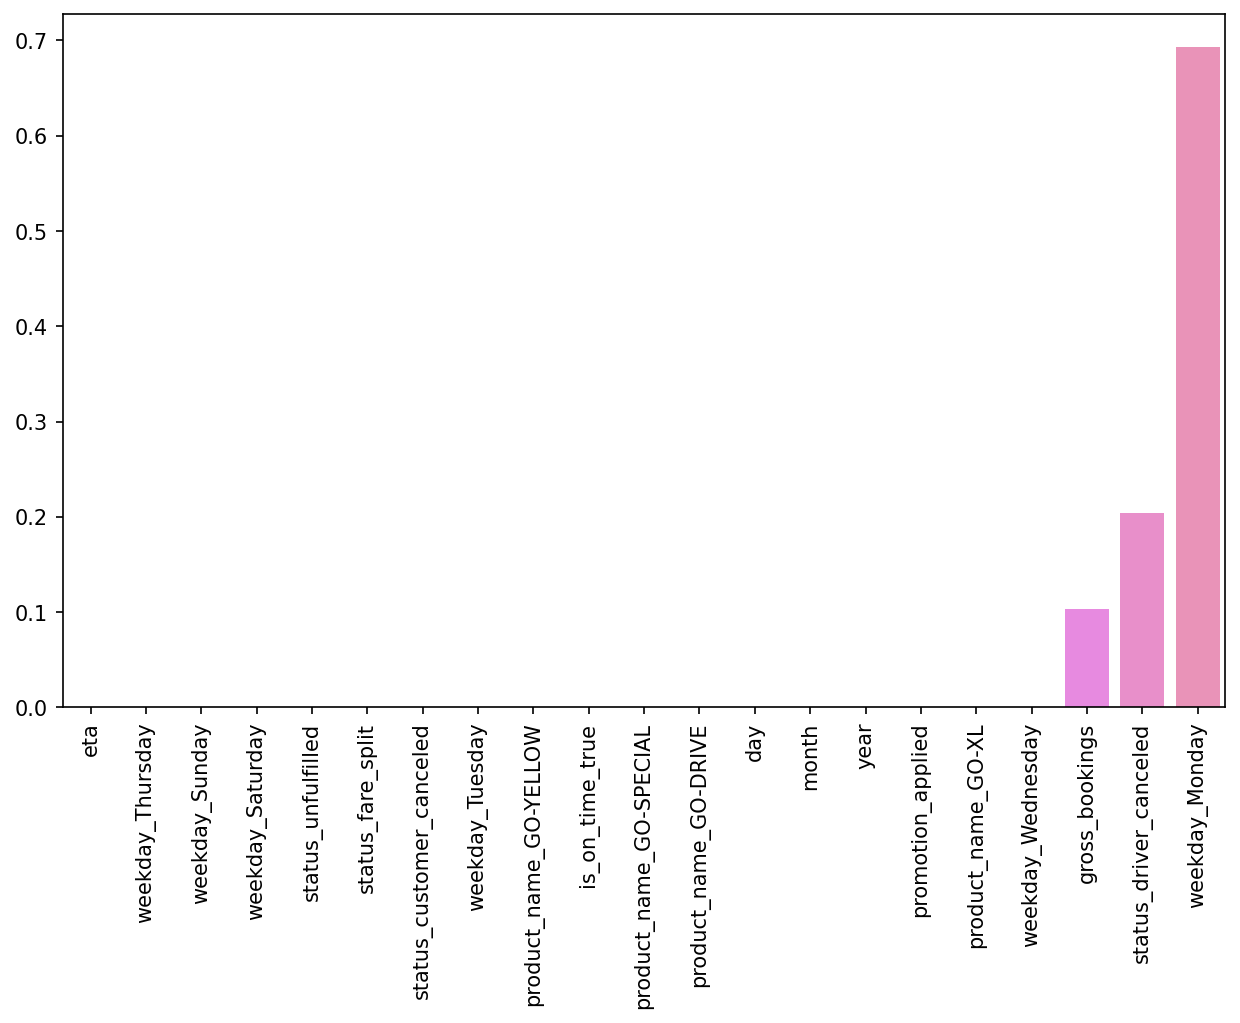

In [ ]:
# Coefficient vizualisation with sorting
coefs = pd.Series(index = X.columns, data = model_6['abc'].feature_importances_)
coefs = coefs.sort_values()
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation = 90)
plt.show()

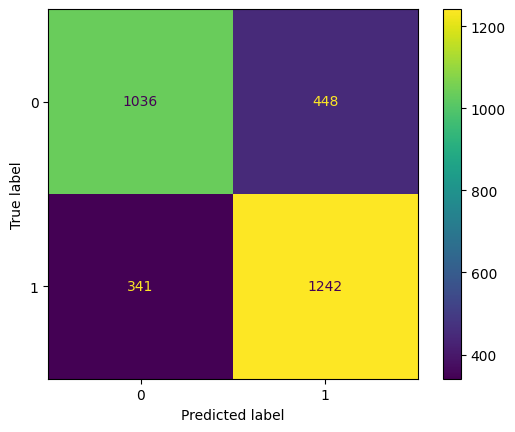

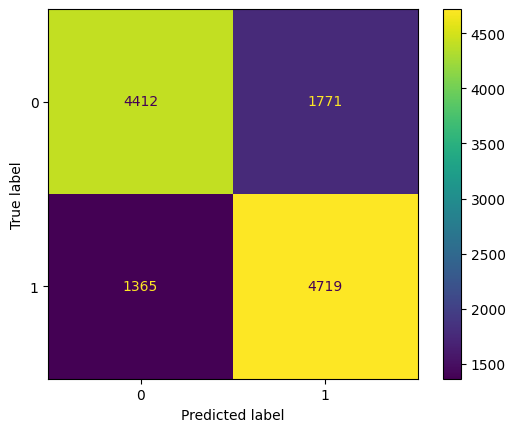

In [ ]:
# Model performance evaluation for test and train set
y_pred = model_6.predict(X_test)
y_pred_tr = model_6.predict(X_train)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_6, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_6, X_train, y_train)

In [ ]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72      1484
           1       0.73      0.78      0.76      1583

    accuracy                           0.74      3067
   macro avg       0.74      0.74      0.74      3067
weighted avg       0.74      0.74      0.74      3067



In [ ]:
# Classification report for train set
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       0.76      0.71      0.74      6183
           1       0.73      0.78      0.75      6084

    accuracy                           0.74     12267
   macro avg       0.75      0.74      0.74     12267
weighted avg       0.75      0.74      0.74     12267



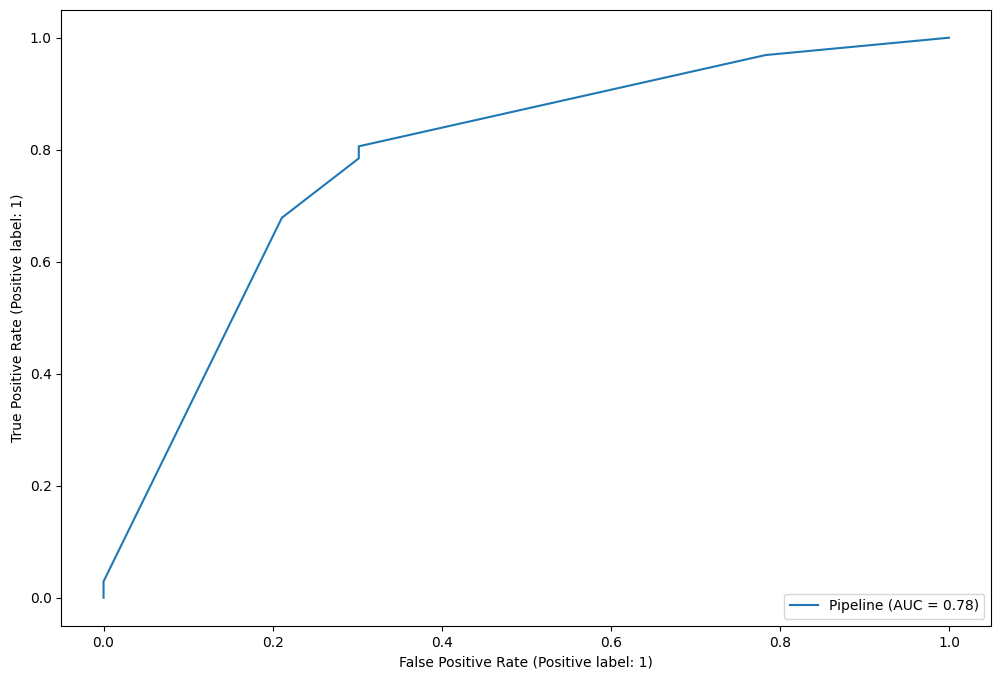

In [ ]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_6, X_test, y_test, ax = ax)
plt.show()

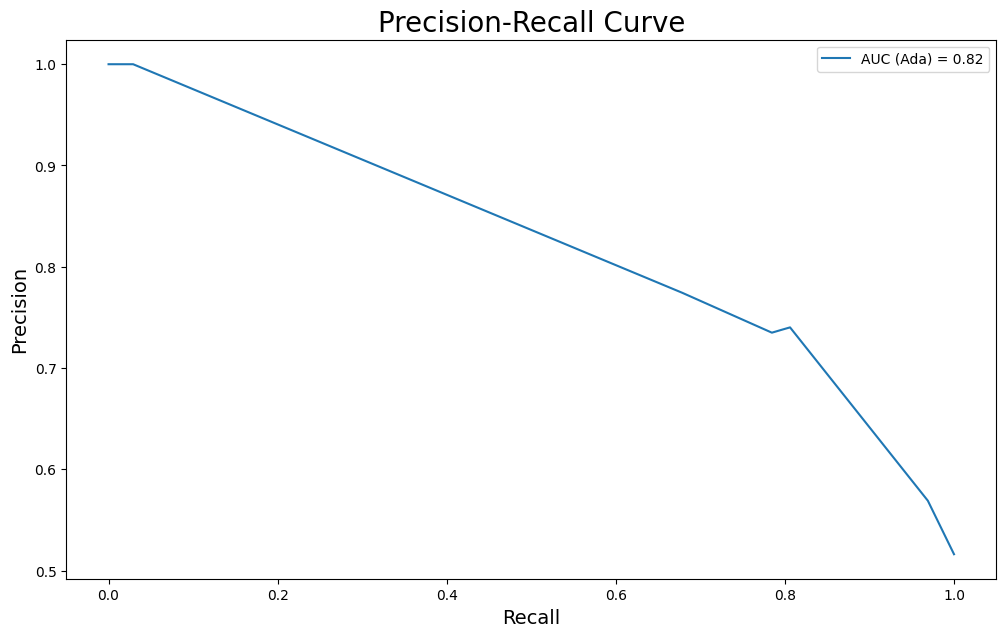

In [ ]:
# Precision-Recall curve
y_scores = model_6.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
auc_6 = metrics.auc(recall, precision)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'AUC (Ada) = {auc_6:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

In [ ]:
# Save model results for summary
results.loc[len(results.index)] = ['AdaBoost', precision_score(y_train, y_pred_tr), recall_score(y_train, y_pred_tr), accuracy_score(y_train, y_pred_tr), f1_score(y_train, y_pred_tr),
                                   precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), auc_6]

# **Gradient Boosting**

In [ ]:
# Model definition
gbc_param_grid = {'gbc__n_estimators': [1,5,10,20,40,100],
             'gbc__max_depth': [3,4,5,6]}
gbc_model = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('gbc', GradientBoostingClassifier())
    ]
)

In [ ]:
# Model fitting
grid_model_gbc = GridSearchCV(gbc_model, param_grid = gbc_param_grid, cv=5, scoring='accuracy')
grid_model_gbc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cat_num_pipeline',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['eta', 'year', 'month', 'day'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         Index(['promotion', 'gross', 'product', 'is', 'status', 'weekday'], dtype='object'))])),
                                       ('gbc', GradientBoostingClassifier())]),
             param_grid={'gbc__max_depth': [3, 4, 5, 6],
                         'gbc__n_estimators': [1, 5, 10, 20, 40, 100]},
             scoring='accuracy')

In [ ]:
# Model parameters
grid_model_gbc.best_estimator_.get_params()

{'memory': None,
 'steps': [('cat_num_pipeline',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    Index(['eta', 'year', 'month', 'day'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('ohe',
                                                     OneHotEncoder(sparse=False))]),
                                    Index(['promotion', 'gross', 'product', 'is', 'status', 'weekday'], dtype='object'))])),
  ('gbc', GradientBoostingClassifier(n_estimators=1))],
 'verbose': False,
 'cat_num_pipeline': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  Index(['eta', 'year', 'month', 'day'], dtype='object')),
                                 ('categorical',
                                  Pipeli

In [ ]:
# Best model parameters
gbc_n_estimators = grid_model_gbc.best_params_['gbc__n_estimators']
gbc_max_depth = grid_model_gbc.best_params_['gbc__max_depth']

In [ ]:
print(gbc_n_estimators, gbc_max_depth)

1 3


In [ ]:
# Best model details
model_7 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('gbc', GradientBoostingClassifier(n_estimators=gbc_n_estimators, max_depth = gbc_max_depth))
    ]
)

In [ ]:
# Best model fitting
model_7.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['eta', 'year', 'month', 'day'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['promotion', 'gross', 'product', 'is', 'status', 'weekday'], dtype='object'))])),
                ('gbc', GradientBoostingClassifier(n_estimators=1))])

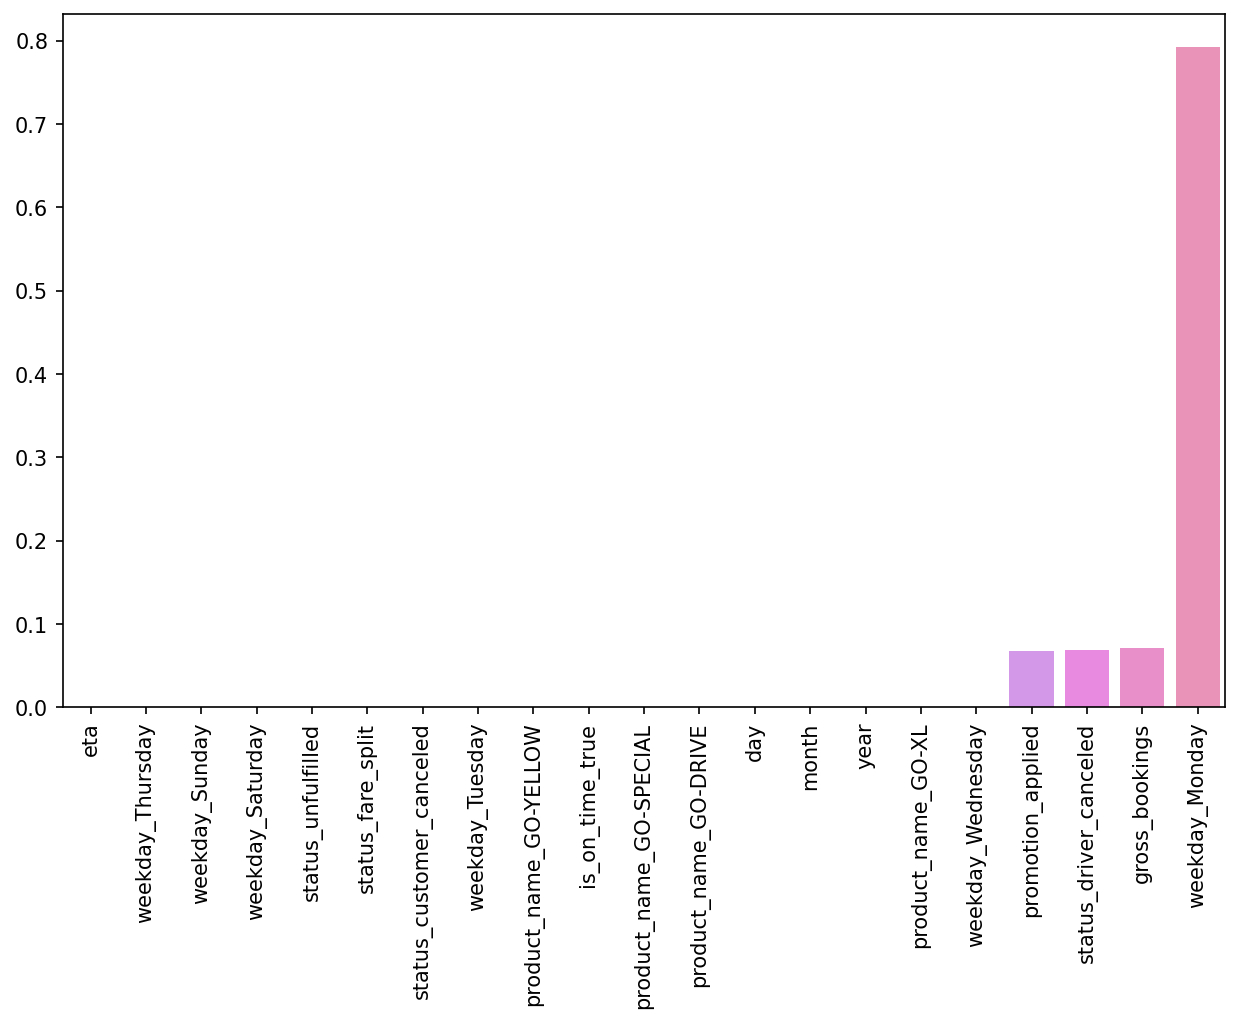

In [ ]:
# Coefficient vizualisation with sorting
coefs = pd.Series(index = X.columns, data = model_7['gbc'].feature_importances_)
coefs = coefs.sort_values()
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation = 90)
plt.show()

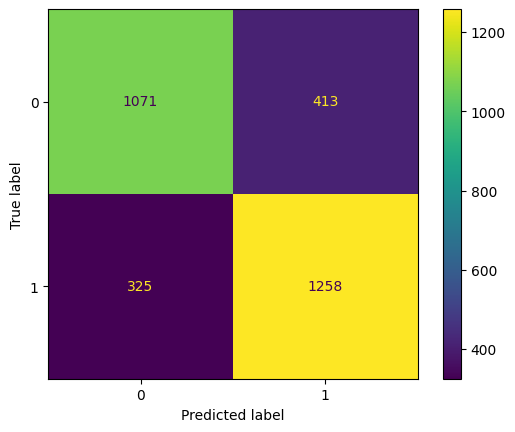

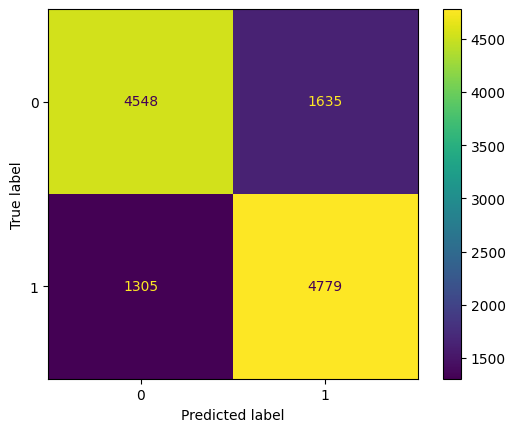

In [ ]:
# Model performance evaluation for test and train set
y_pred = model_7.predict(X_test)
y_pred_tr = model_7.predict(X_train)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_7, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_7, X_train, y_train)

In [ ]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1484
           1       0.75      0.79      0.77      1583

    accuracy                           0.76      3067
   macro avg       0.76      0.76      0.76      3067
weighted avg       0.76      0.76      0.76      3067



In [ ]:
# Classification report for train set
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      6183
           1       0.75      0.79      0.76      6084

    accuracy                           0.76     12267
   macro avg       0.76      0.76      0.76     12267
weighted avg       0.76      0.76      0.76     12267



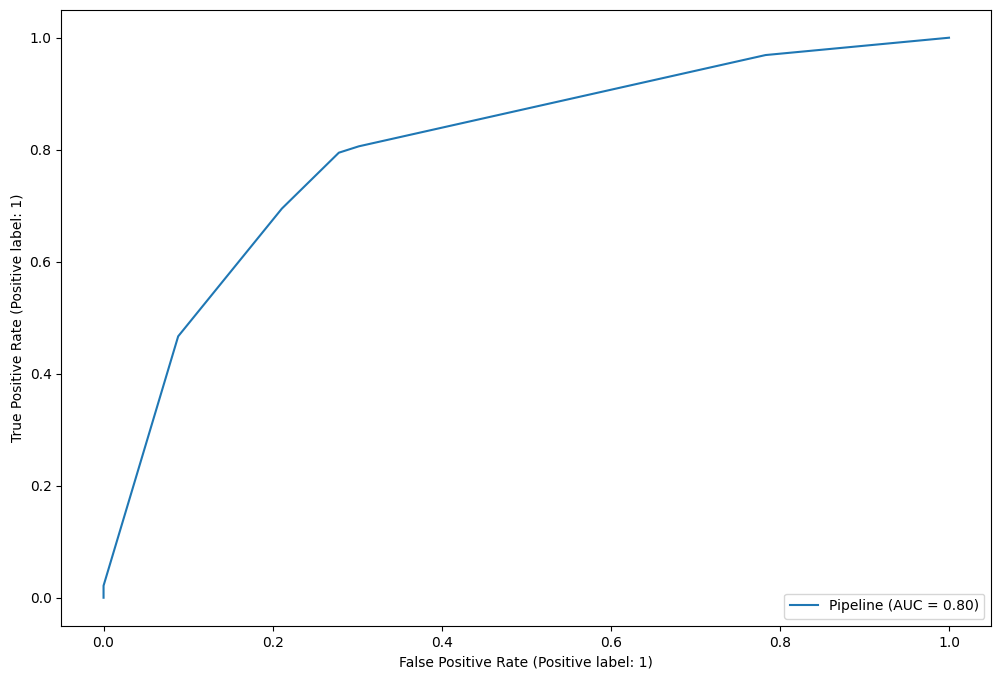

In [ ]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_7, X_test, y_test, ax = ax)
plt.show()

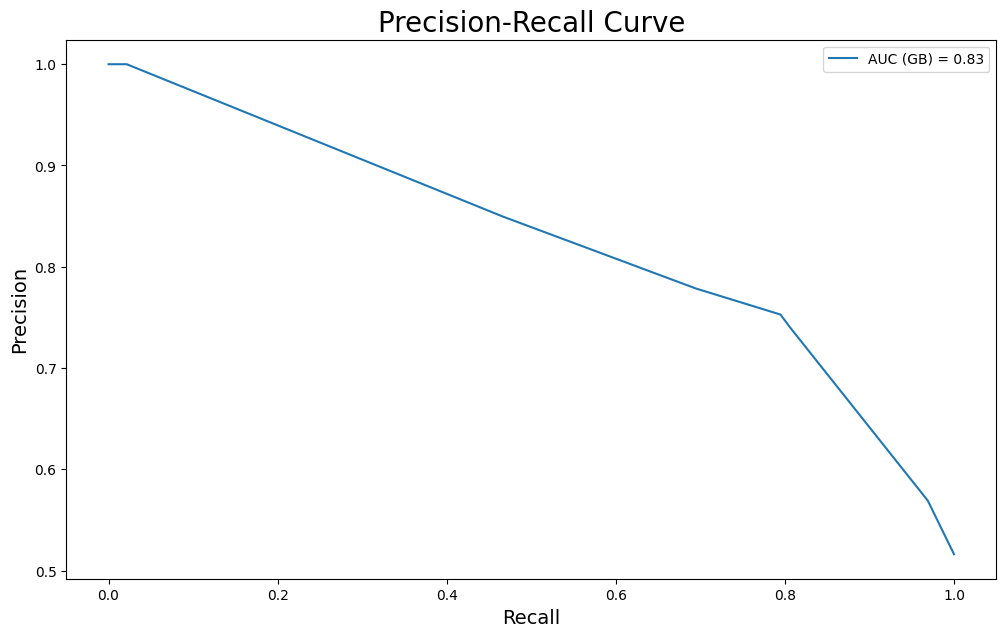

In [ ]:
# Precision-Recall curve
y_scores = model_7.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
auc_7 = metrics.auc(recall, precision)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'AUC (GB) = {auc_7:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

In [ ]:
# Save model results for summary
results.loc[len(results.index)] = ['Gradient Boosting', precision_score(y_train, y_pred_tr), recall_score(y_train, y_pred_tr), accuracy_score(y_train, y_pred_tr), f1_score(y_train, y_pred_tr),
                                   precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), auc_7]

# **Model summary**

In [ ]:
results

Name  Precision train  Recall train  Accuracy train  \
0  Logistic regression         0.735984      0.794050        0.756583   
1                  KNN         0.995410      0.998028        0.996739   
2                  SVC         0.735622      0.792571        0.755849   
3                 Tree         0.727119      0.775641        0.744355   
4        Random forest         0.998187      0.995233        0.996739   
5             AdaBoost         0.727119      0.775641        0.744355   
6    Gradient Boosting         0.745089      0.785503        0.760333   

   F1 train  Precision test  Recall test  Accuracy test   F1 test  AUC test  
0  0.763915        0.745338     0.807960       0.758396  0.775386  0.818306  
1  0.996717        0.817397     0.837018       0.819367  0.827091  0.869268  
2  0.763035        0.743724     0.804801       0.756113  0.773058  0.723484  
3  0.750596        0.734911     0.784586       0.742745  0.758937  0.815341  
4  0.996708        0.844806     0.852811       0.843169  0.848790  0.917153  
5  0.750596        0.734911     0.784586       0.742745  0.758937  0.824588  
6  0.764762        0.752843     0.794694       0.759374  0.773202  0.827312



*   Among all models, best results for train set had: Random forest (precision), KNN (recall), KNN and Random forest (accuracy), KNN (F1 score).
* Among all models, best results for test set had: Random forest (precision, recall, accuracy, F1 score).
* Tree and boosting methods have achieved similar results in comparison to LR, KNN and SVC ones.
* Probably, the change of undersampling/oversampling method will result in better model performances.
* Likely, the artificial neural network models will achieve the best performances.
* For test set, the Random forest model achieved the best overall results. However, the difference between train and test results for this model (almost 100% for all measures) suggested that this model is overfitted.
* The same situation was observed for Random forest model.
* Taking above into consideration, model **Gradient Boosting** will be target due to its high and stable performance on train and test data in context of all parameters.

